# **Used Cars Price Prediction**

### The Context:
Car selling already involves many parameters to consider. From the brand to the number of seats, customer preferences can shift significantly and influence how much they are willing to pay for a new vehicle. However, these features only allow for a limited number of combinations. The complexity increases rapidly when usage is taken into account. Two identical Toyota Prius vehicles (same year, model, etc.) can have very different prices depending on mileage, number of previous owners, and other usage-related factors.
Therefore, building a model that offers pricing guidance becomes essential for the selling company. Without such a model, each case must be evaluated manually, leading to a trade-off between efficiency and potential profit.

### The Objective:

The goal is to build a model that enables a fair degree of automation, providing quick estimates of potential selling prices. This should be achieved without sacrificing interpretability, so that the company can implement informed policies and make strategic decisions based on specific features beyond just the price.

### The problem formulation

Using Data Science, we aim to reduce the uncertainty caused by the high number of variables involved in pricing used cars. Our goal is to understand how each feature influences the selling price, and to improve business efficiency by building a model that eliminates the cold start of having to manually define the price of each individual car.

### **Data Dictionary**

**S.No.** : Serial Number

**Name** : Name of the car which includes Brand name and Model name

**Location** : The location in which the car is being sold or is available for purchase (Cities)

**Year** : Manufacturing year of the car

**Kilometers_driven** : The total kilometers driven in the car by the previous owner(s) in KM

**Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

**Transmission** : The type of transmission used by the car (Automatic / Manual)

**Owner** : Type of ownership

**Mileage** : The standard mileage offered by the car company in kmpl or km/kg

**Engine** : The displacement volume of the engine in CC

**Power** : The maximum power of the engine in bhp

**Seats** : The number of seats in the car

**New_Price** : The price of a new car of the same model in INR 100,000

**Price** : The price of the used car in INR 100,000 (**Target Variable**)

### **Loading libraries**

In [ ]:
# Importing libraries for data manipulation
import numpy as np

import pandas as pd
from pandas.api.types import is_numeric_dtype, is_categorical_dtype

# Importing libraries for data visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Importing libraries for building linear regression model
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error,  make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from scipy.stats import skew, probplot, stats, shapiro

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

### **Let us load the data**

In [51]:
df = pd.read_csv("used_cars.csv")
print(df.head())

   S.No.                              Name    Location  Year  \
0      0            Maruti Wagon R LXI CNG      Mumbai  2010   
1      1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2      2                      Honda Jazz V     Chennai  2011   
3      3                 Maruti Ertiga VDI     Chennai  2012   
4      4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   

   Kilometers_Driven Fuel_Type Transmission Owner_Type  Mileage  Engine  \
0              72000       CNG       Manual      First    26.60   998.0   
1              41000    Diesel       Manual      First    19.67  1582.0   
2              46000    Petrol       Manual      First    18.20  1199.0   
3              87000    Diesel       Manual      First    20.77  1248.0   
4              40670    Diesel    Automatic     Second    15.20  1968.0   

    Power  Seats  New_price  Price  
0   58.16    5.0        NaN   1.75  
1  126.20    5.0        NaN  12.50  
2   88.70    5.0       8.61   4.50  
3   88.76    7.0

## Data Overview

In [52]:
print(df.shape)
print("--" * 50)
print(df.info())
print("--" * 50)
print(df.isnull().sum())
print("--" * 50)
print(df.describe())
print("--" * 50)
print(df.apply(lambda x: len(x.unique())))


(7253, 14)
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float

- The dataset contains 7,253 entries and 14 columns, with Price as the target (dependent) variable.
- It includes a mix of numerical (e.g., Year, Kilometers_Driven, Mileage, Engine, Power) and categorical features (e.g., Fuel_Type, Transmission, Owner_Type, Location, Name).
- The Transmission feature is binary categorical, with values like "Manual" and "Automatic".
- Some columns contain missing values, particularly: New_price (many missing values), and also Mileage, Engine, Power, and Seats.

## **Exploratory Data Analysis**

In [53]:
print(df.describe(include="all")) # Summary statistics for numerical features
print("--" * 50)
print(df.apply(lambda x: len(x.unique())))
print("--" * 50)
print(df.head(10))


              S.No.                    Name Location         Year  \
count   7253.000000                    7253     7253  7253.000000   
unique          NaN                    2041       11          NaN   
top             NaN  Mahindra XUV500 W8 2WD   Mumbai          NaN   
freq            NaN                      55      949          NaN   
mean    3626.000000                     NaN      NaN  2013.365366   
std     2093.905084                     NaN      NaN     3.254421   
min        0.000000                     NaN      NaN  1996.000000   
25%     1813.000000                     NaN      NaN  2011.000000   
50%     3626.000000                     NaN      NaN  2014.000000   
75%     5439.000000                     NaN      NaN  2016.000000   
max     7252.000000                     NaN      NaN  2019.000000   

        Kilometers_Driven Fuel_Type Transmission Owner_Type      Mileage  \
count        7.253000e+03      7253         7253       7253  7251.000000   
unique             

1)
- Serial number: 7253 values (all unique). It's an identifier, not a feature in on itself.
- Name: 7253 values (2041 unique). Too much granularity. Variable contains both brand and model.
- Location: 7253 values (11 unique). Top location: Mumbai (949 entries). 
- Year: 7253 entries (23 unique). From 1996 to 2019. 
- Kilometers Driven: 7253 entries (continuous variable). Values range from 171 to 6,500,000 kms
- Fuel Type: 7253 values, 5 unique. Includes CNG, Diesel, Petrol, among others.
- Transmission: 7253 values, 2 unique. Manual and Automatic. Binary variable
- Owner Type: 7253 values, 4 unique. Includes First, Second, etc.
- Mileage: 7251 non-null values. Continuous variable. Values range from 0 to 33.54.
- Engine: 7207 non-null values. Continuous variable. Values range from 72 (probably an error) to 5998.
- Power: 7078 non-null values. Values range from 34.2 to 616.
- Seats: 7200 non-null values. Values range from 2 to 10.
- New Price: 1006 non-null values. Most values are missing.
- Price: 6019 non-null values. Values range from 0.44 to 160.

In [54]:
print(df["Owner_Type"].unique())

['First' 'Second' 'Fourth & Above' 'Third']


#### Categorical features:
- Name: 2041 categories. As mentioned earlier, it will be necessary to separate the brand from the model.
- Location: 11 categories.
- Fuel type: 5 categories.
- Transmission: 2 categories (binary). It's better to use dummy encoding.
- Owner type: 4 categories. From "First" to "Fourth and Above"



In [55]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Print the 5 smallest unique values of each numerical column
for col in numerical_columns:
    print(f"\nHeads and tails of '{col}':")
    print(sorted(df[col].unique())[:5])
    print(sorted(df[col].unique())[-5:])
    print("--" * 50)



Heads and tails of 'S.No.':
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4)]
[np.int64(7248), np.int64(7249), np.int64(7250), np.int64(7251), np.int64(7252)]
----------------------------------------------------------------------------------------------------

Heads and tails of 'Year':
[np.int64(1996), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001)]
[np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019)]
----------------------------------------------------------------------------------------------------

Heads and tails of 'Kilometers_Driven':
[np.int64(171), np.int64(600), np.int64(1000), np.int64(1001), np.int64(1011)]
[np.int64(480000), np.int64(620000), np.int64(720000), np.int64(775000), np.int64(6500000)]
----------------------------------------------------------------------------------------------------

Heads and tails of 'Mileage':
[np.float64(0.0), np.float64(6.4), np.float64(7.5), np.float64(7.81), np.float64(7.94)]


In [56]:
df.loc[df["Kilometers_Driven"] > 1000000, "Kilometers_Driven"] = np.nan
df.loc[df["Mileage"] == 0, "Mileage"] = np.nan

In [57]:
# Double-check for suspicious values
print(df[df["Price"] < 0.5][["Name", "Year", "Kilometers_Driven", "Price", "New_price"]])


                      Name  Year  Kilometers_Driven  Price  New_price
1628  Maruti 800 Std BSIII  2004            12000.0   0.45        NaN
1713          Tata Nano Lx  2011            65000.0   0.44        NaN
2847      Hyundai Getz GLS  2005            86000.0   0.45        NaN
3138        Maruti Zen LXI  1998            95150.0   0.45        NaN


The most evident errors in extreme values appear in Kilometers Driven and Mileage. Some prices also seem suspicious, but there isn’t enough evidence yet to justify dropping them. After performing a univariate analysis, it may become clearer whether these values should be handled or removed.

## **Univariate Analysis**

In [58]:
def univariate_analysis_cuantitative(column_name): # Defining a function for quicker univariate analysis
    data = df[column_name]
    print(data.describe())

    skewness = data.skew()
    print(f"Skewness: {skewness:.2f}")

    if skewness > 1:
        print("High skew detected. Plotting log-transformed version as well.\n")

    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=50, kde=True)
    plt.title(f"Distribution of {column_name}", fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel("Frequency")
    plt.show()

    plt.figure(figsize=(8, 1.5))
    sns.boxplot(x=data)
    plt.title(f"Boxplot of {column_name}", fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.show()

    if skewness > 1: # Log transformation for high skewness
        data_log = np.log1p(data)
        print(data_log.describe())
        plt.figure(figsize=(8, 5))
        sns.histplot(data_log, bins=50, kde=True)
        plt.title(f"Log-Transformed Distribution of {column_name}", fontsize=16)
        plt.xlabel(f"log(1 + {column_name})", fontsize=14)
        plt.ylabel("Frequency")
        plt.show()

        plt.figure(figsize=(8, 1.5))
        sns.boxplot(x=data_log)
        plt.title(f"Boxplot of {column_name}", fontsize=16)
        plt.xlabel(column_name, fontsize=14)
        plt.show()

        skewness_log = data_log.skew()
        print(f"Skewness: {skewness_log:.2f}")

def univariate_analysis_qualitative(column_name):
    data = df[column_name]

    # Basic category count and proportion
    print("Value counts:")
    print(data.value_counts(dropna=False))
    print("\nRelative frequencies:")
    print(data.value_counts(normalize=True, dropna=False).round(3))

    # Limit plot to top 20 categories to keep it readable
    top_categories = data.value_counts().nlargest(20).index

    plt.figure(figsize=(10, 5))
    sns.countplot(x=data, order=top_categories)
    plt.title(f"Count Plot of {column_name}", fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

#### Plots and analysis:


=== Analyzing 'S.No.' ===
count    7253.000000
mean     3626.000000
std      2093.905084
min         0.000000
25%      1813.000000
50%      3626.000000
75%      5439.000000
max      7252.000000
Name: S.No., dtype: float64
Skewness: 0.00


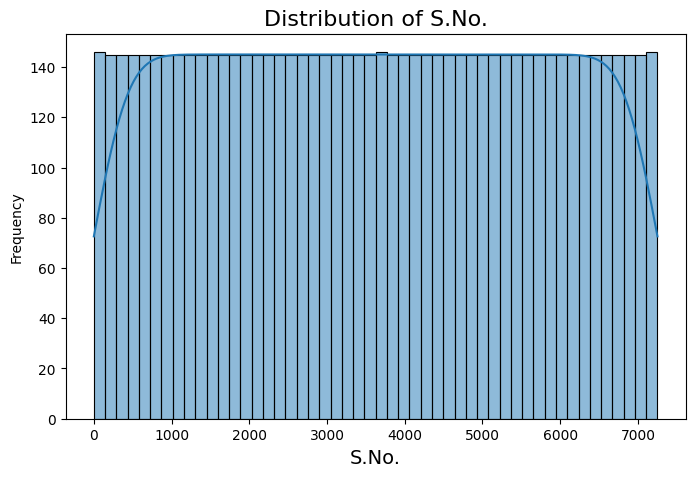

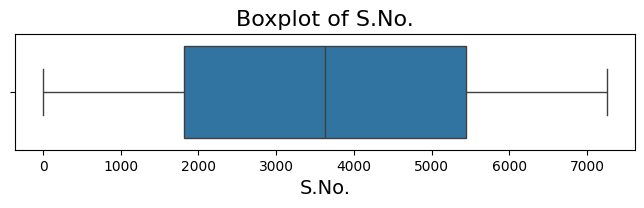


=== Analyzing 'Name' ===
Value counts:
Name
Mahindra XUV500 W8 2WD                     55
Maruti Swift VDI                           49
Maruti Swift Dzire VDI                     42
Honda City 1.5 S MT                        39
Maruti Swift VDI BSIV                      37
                                           ..
OpelCorsa 1.4Gsi                            1
Volkswagen Vento 1.2 TSI Comfortline AT     1
Hyundai Santro Xing XG AT eRLX Euro III     1
Mahindra KUV 100 mFALCON D75 K6 5str AW     1
Mahindra Scorpio VLX 2WD BSIII              1
Name: count, Length: 2041, dtype: int64

Relative frequencies:
Name
Mahindra XUV500 W8 2WD                     0.008
Maruti Swift VDI                           0.007
Maruti Swift Dzire VDI                     0.006
Honda City 1.5 S MT                        0.005
Maruti Swift VDI BSIV                      0.005
                                           ...  
OpelCorsa 1.4Gsi                           0.000
Volkswagen Vento 1.2 TSI Comfortline A

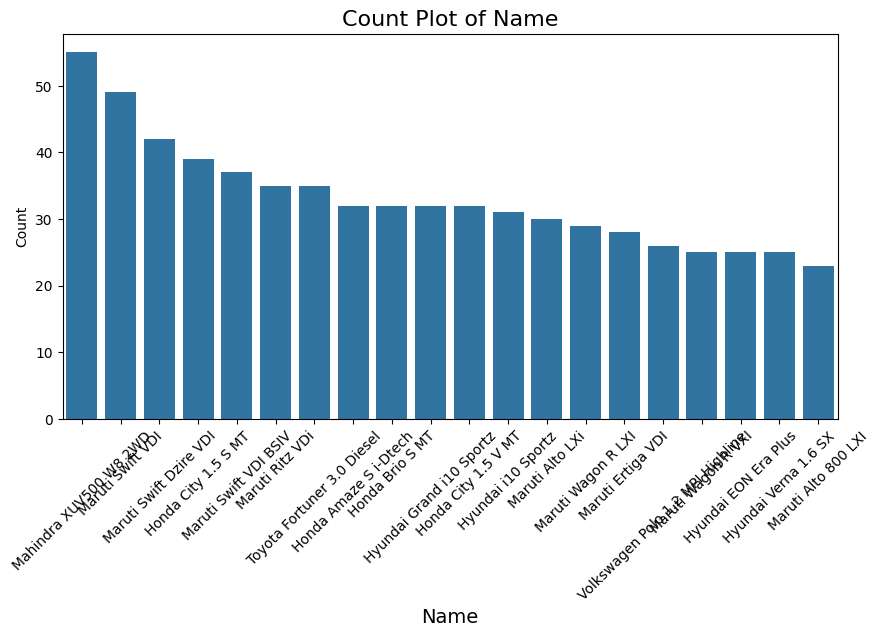


=== Analyzing 'Location' ===
Value counts:
Location
Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: count, dtype: int64

Relative frequencies:
Location
Mumbai        0.131
Hyderabad     0.121
Coimbatore    0.106
Kochi         0.106
Pune          0.105
Delhi         0.091
Kolkata       0.090
Chennai       0.081
Jaipur        0.069
Bangalore     0.061
Ahmedabad     0.038
Name: proportion, dtype: float64


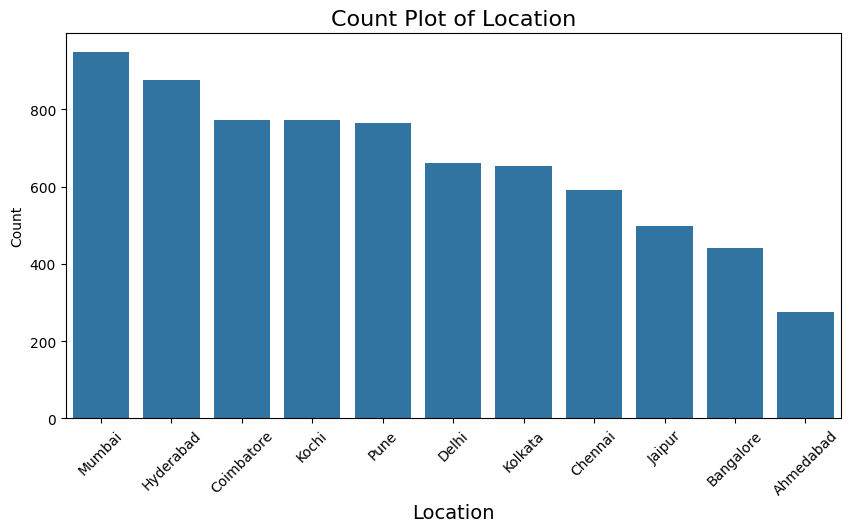


=== Analyzing 'Year' ===
count    7253.000000
mean     2013.365366
std         3.254421
min      1996.000000
25%      2011.000000
50%      2014.000000
75%      2016.000000
max      2019.000000
Name: Year, dtype: float64
Skewness: -0.84


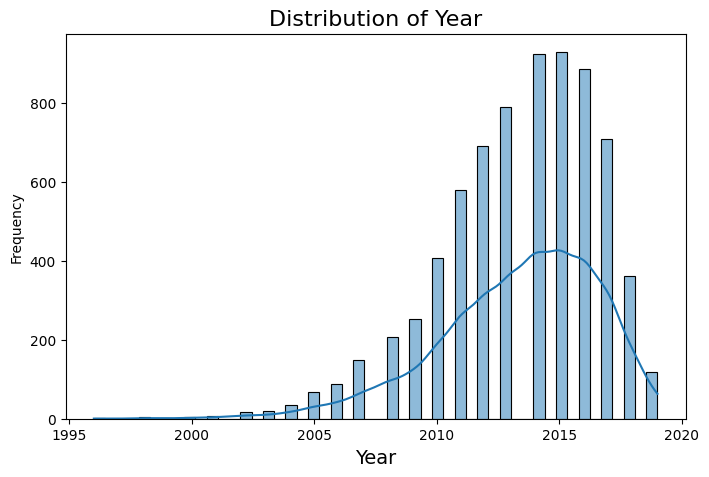

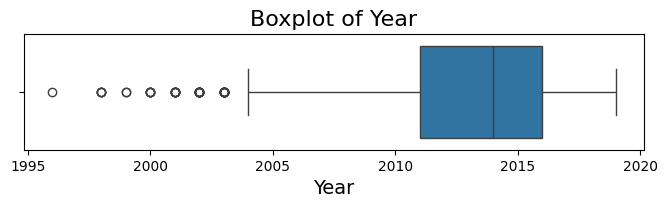


=== Analyzing 'Kilometers_Driven' ===
count      7252.000000
mean      57810.852868
std       37499.537277
min         171.000000
25%       34000.000000
50%       53404.000000
75%       73000.000000
max      775000.000000
Name: Kilometers_Driven, dtype: float64
Skewness: 3.83
High skew detected. Plotting log-transformed version as well.



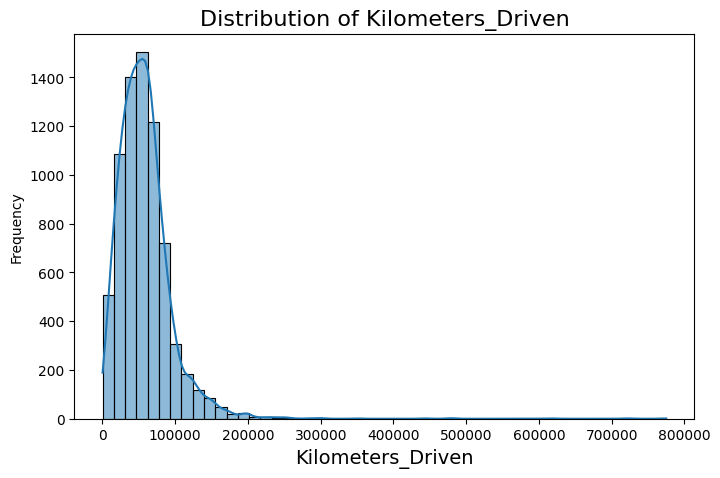

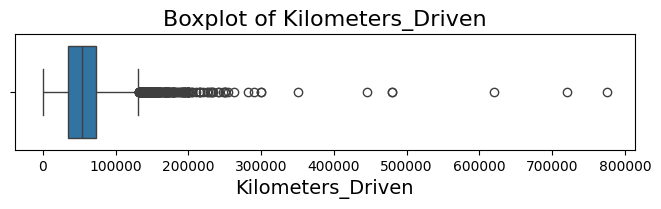

count    7252.000000
mean       10.760331
std         0.713985
min         5.147494
25%        10.434145
50%        10.885660
75%        11.198228
max        13.560620
Name: Kilometers_Driven, dtype: float64


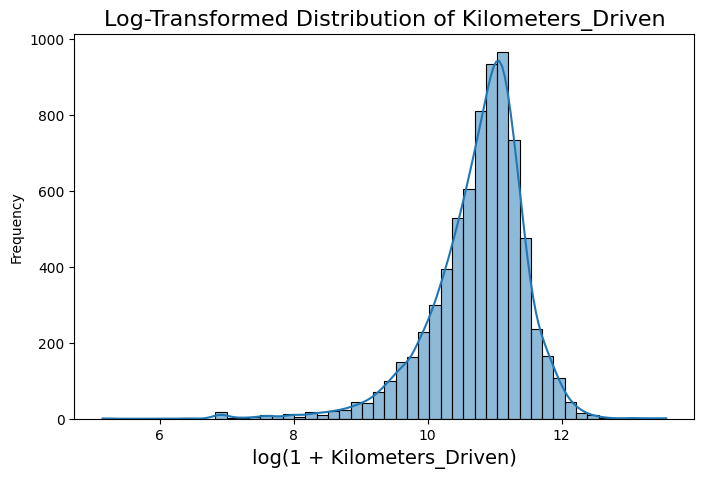

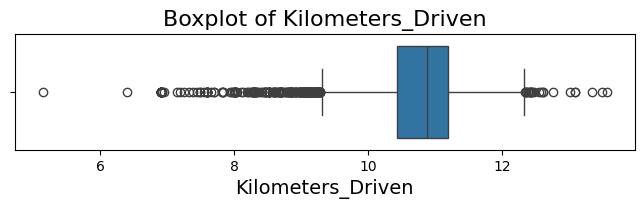

Skewness: -1.35

=== Analyzing 'Fuel_Type' ===
Value counts:
Fuel_Type
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: count, dtype: int64

Relative frequencies:
Fuel_Type
Diesel      0.531
Petrol      0.458
CNG         0.009
LPG         0.002
Electric    0.000
Name: proportion, dtype: float64


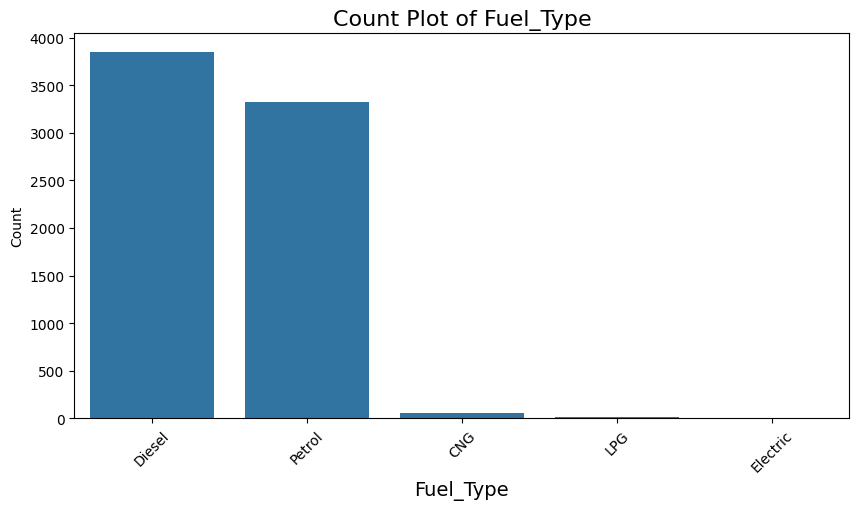


=== Analyzing 'Transmission' ===
Value counts:
Transmission
Manual       5204
Automatic    2049
Name: count, dtype: int64

Relative frequencies:
Transmission
Manual       0.717
Automatic    0.283
Name: proportion, dtype: float64


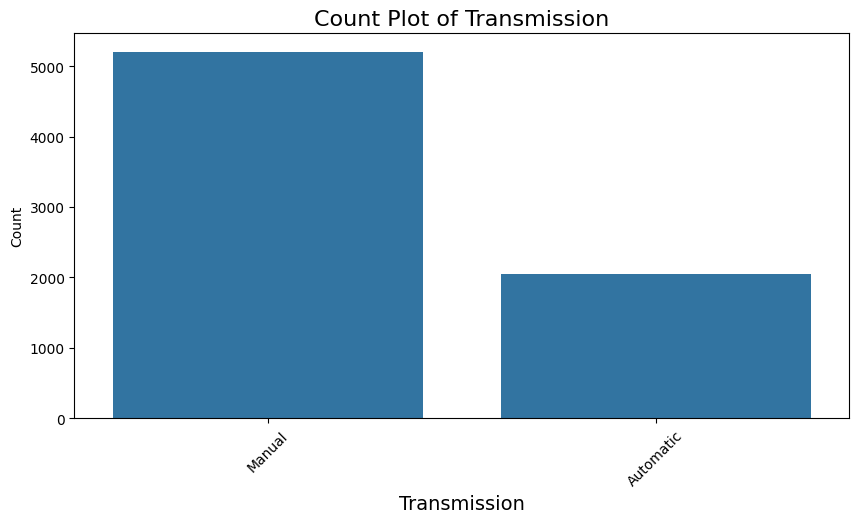


=== Analyzing 'Owner_Type' ===
Value counts:
Owner_Type
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: count, dtype: int64

Relative frequencies:
Owner_Type
First             0.821
Second            0.159
Third             0.019
Fourth & Above    0.002
Name: proportion, dtype: float64


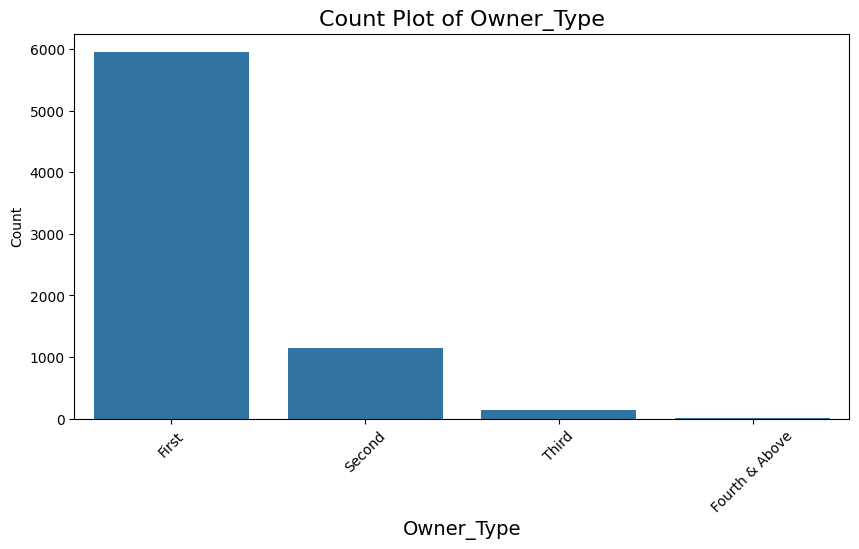


=== Analyzing 'Mileage' ===
count    7170.000000
mean       18.346527
std         4.157910
min         6.400000
25%        15.300000
50%        18.200000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64
Skewness: 0.21


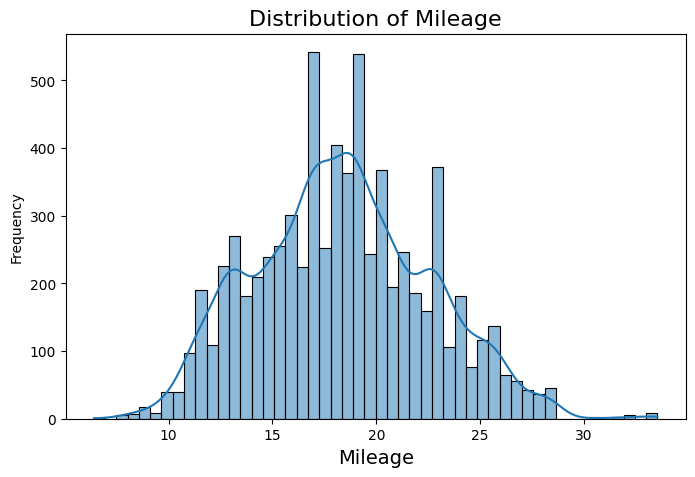

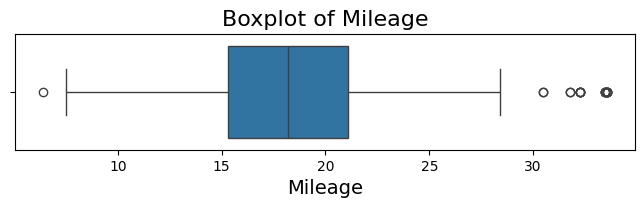


=== Analyzing 'Engine' ===
count    7207.000000
mean     1616.573470
std       595.285137
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine, dtype: float64
Skewness: 1.41
High skew detected. Plotting log-transformed version as well.



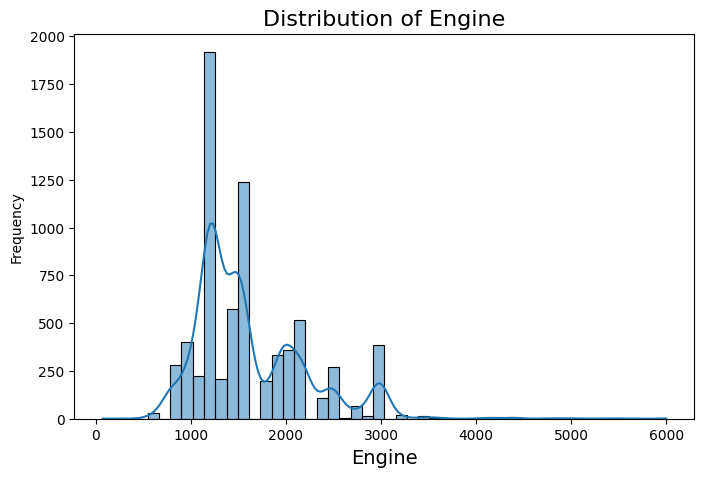

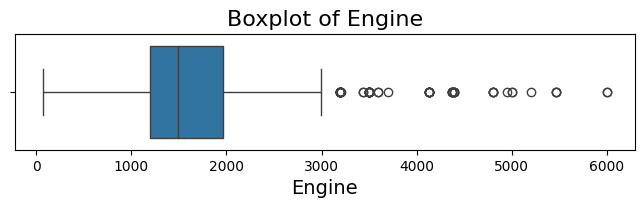

count    7207.000000
mean        7.329349
std         0.338166
min         4.290459
25%         7.089243
50%         7.309212
75%         7.585281
max         8.699348
Name: Engine, dtype: float64


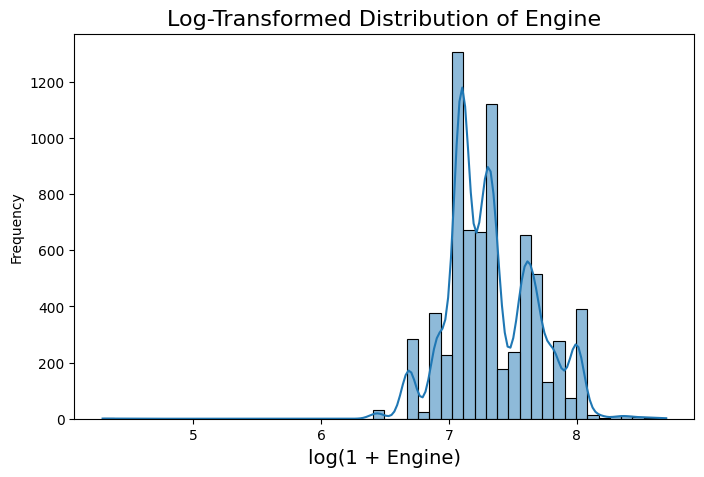

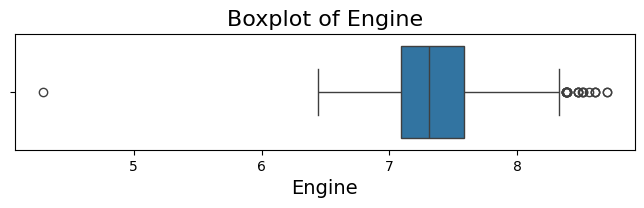

Skewness: 0.30

=== Analyzing 'Power' ===
count    7078.000000
mean      112.765214
std        53.493553
min        34.200000
25%        75.000000
50%        94.000000
75%       138.100000
max       616.000000
Name: Power, dtype: float64
Skewness: 1.96
High skew detected. Plotting log-transformed version as well.



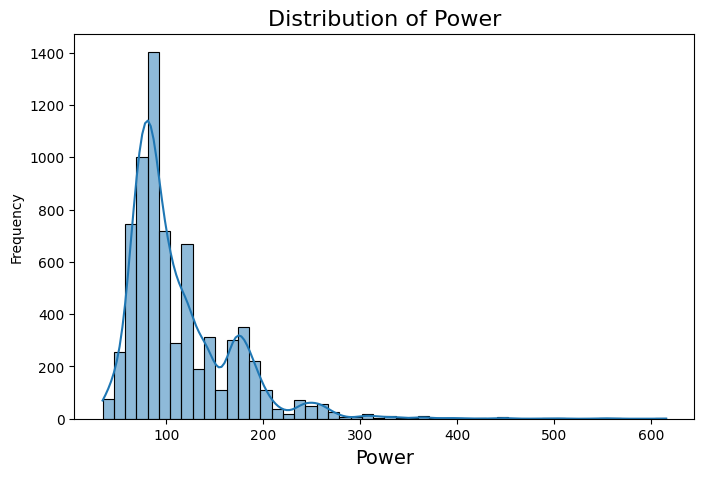

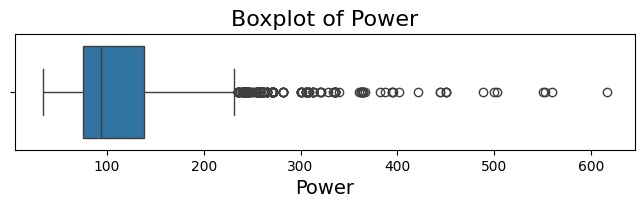

count    7078.000000
mean        4.644392
std         0.410933
min         3.561046
25%         4.330733
50%         4.553877
75%         4.935193
max         6.424869
Name: Power, dtype: float64


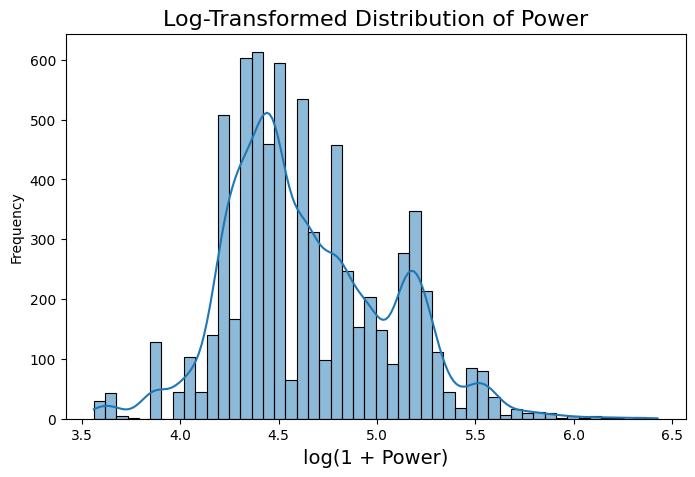

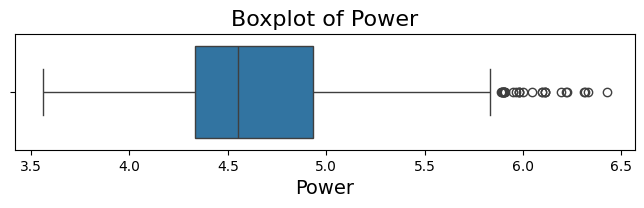

Skewness: 0.46

=== Analyzing 'Seats' ===
Value counts:
Seats
5.0     6048
7.0      796
8.0      170
4.0      119
NaN       53
6.0       38
2.0       18
10.0       8
9.0        3
Name: count, dtype: int64

Relative frequencies:
Seats
5.0     0.834
7.0     0.110
8.0     0.023
4.0     0.016
NaN     0.007
6.0     0.005
2.0     0.002
10.0    0.001
9.0     0.000
Name: proportion, dtype: float64


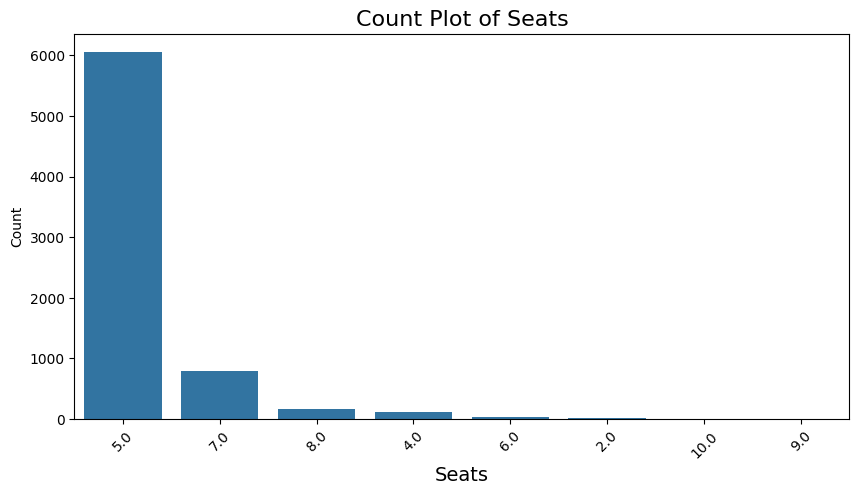


=== Analyzing 'New_price' ===
count    1006.000000
mean       22.779692
std        27.759344
min         3.910000
25%         7.885000
50%        11.570000
75%        26.042500
max       375.000000
Name: New_price, dtype: float64
Skewness: 4.13
High skew detected. Plotting log-transformed version as well.



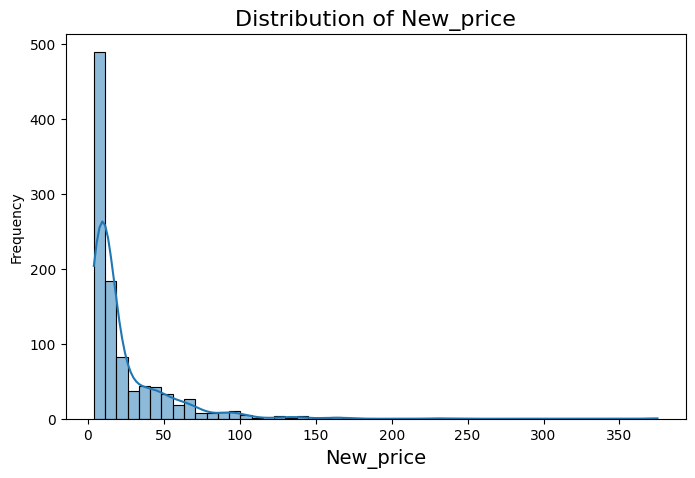

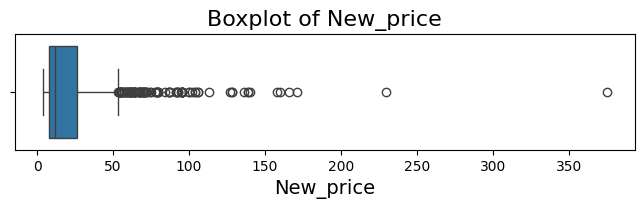

count    1006.000000
mean        2.777358
std         0.813769
min         1.591274
25%         2.184364
50%         2.531313
75%         3.297390
max         5.929589
Name: New_price, dtype: float64


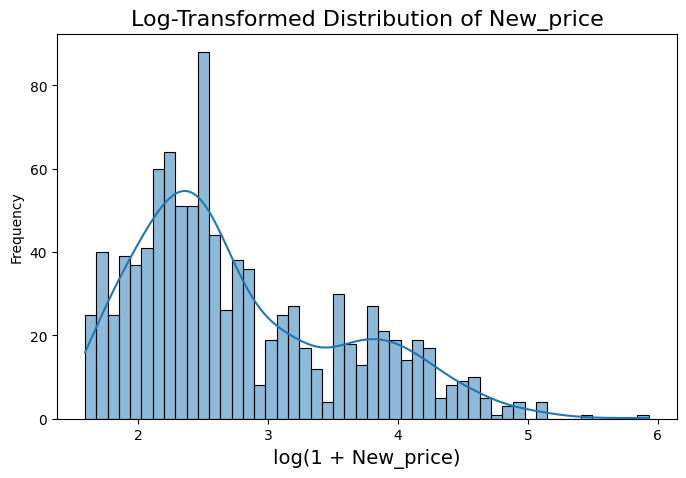

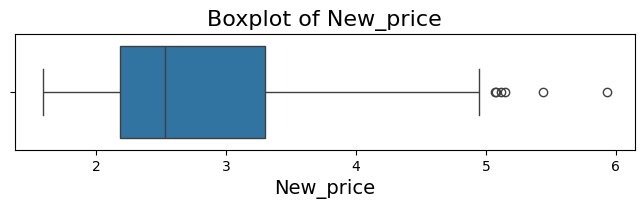

Skewness: 0.80

=== Analyzing 'Price' ===
count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64
Skewness: 3.34
High skew detected. Plotting log-transformed version as well.



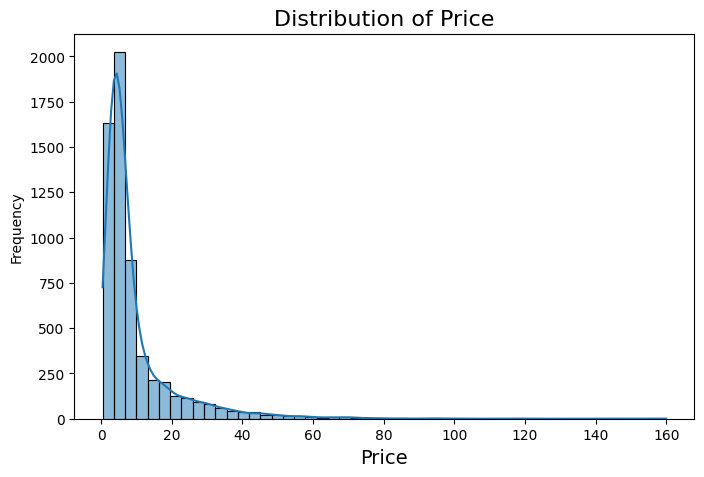

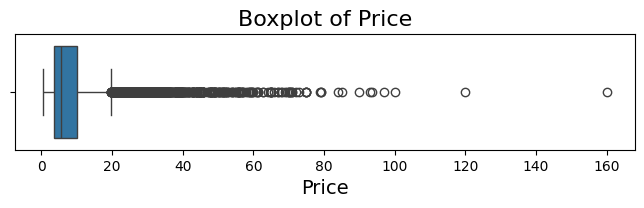

count    6019.000000
mean        2.018429
std         0.748221
min         0.364643
25%         1.504077
50%         1.893112
75%         2.393339
max         5.081404
Name: Price, dtype: float64


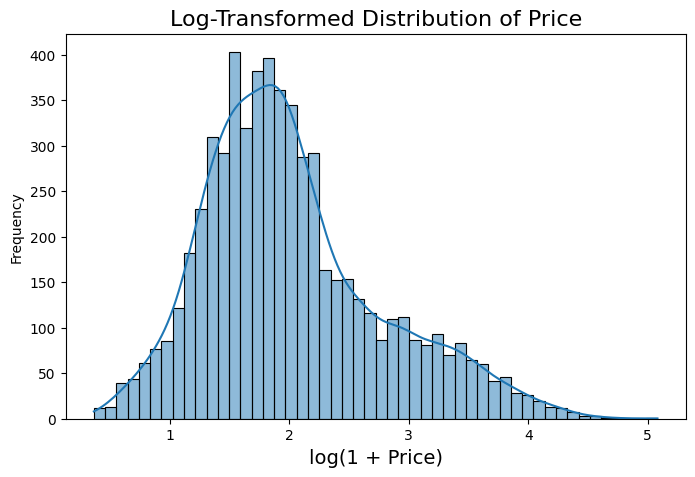

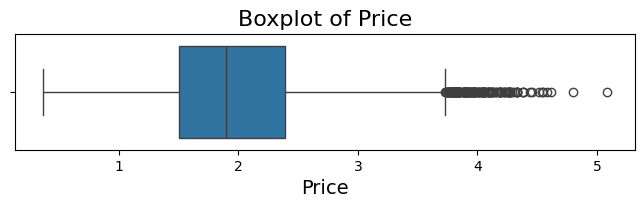

Skewness: 0.75


In [59]:
# Run univariate analysis for each column in df
for col in df.columns:
    print(f"\n=== Analyzing '{col}' ===")
    if df[col].dtype in ["int64", "float64"] and df[col].nunique() > 12:
        univariate_analysis_cuantitative(col)
    else:
        univariate_analysis_qualitative(col)


### Univariate Analysis Summary
- **Name**: Not in an ideal format — it's necessary to split it into "Brand" and "Model" during feature engineering. The most common model in the dataset is *Mahindra XUV500 W8 2WD*.
- **Location**: Most cars are listed in Mumbai (13.2%), while Ahmedabad has the fewest (3.7%).
- **Year**: Left-skewed data. Median year is 2014. There are outliers on the lower end of the distribution (older vehicles). Consider treating it as a categorical or ordinal feature depending on model type.
- **Kilometers_Driven**: Heavily right-skewed with many upper-end outliers. A log transformation improves the distribution slightly, but it remains skewed with outliers on both ends. Some feature engineering (e.g. binning or scaling) may help.
- **Fuel_Type**: Over 98% of vehicles use Diesel or Petrol. CNG, LPG, and Electric are rare, which may make it hard for the model to generalize on those classes.
- **Transmission**: 71.8% of the cars have manual transmission. However, the number of automatic cars is sufficient to analyze its impact on price.
- **Owner_Type**: The majority of vehicles (82.2%) have had only one owner. Data on third or fourth+ owners is scarce and may not be reliable for modeling.
- **Mileage**: Slightly right-skewed and roughly normally distributed, with a few outliers on both sides. The average mileage is 18.34 km/l.
- **Engine**: Strong right skew with several upper-end outliers. A log transformation helps reduce skewness but does not eliminate outliers.
- **Power**: Heavily right-skewed with many outliers. A log transformation partially normalizes the distribution but significant skew and outliers remain.
- **Seats**: Most cars have 5 seats. Due to its discrete and categorical nature, it’s likely better to treat this as a categorical variable.
- **New_Price**: Strongly right-skewed with many outliers. A log transformation partially reduces the skew, but several outliers remain. Many missing values make this column questionable for modeling unless imputation or external data is applied.
- **Price**: The target variable. It’s heavily right-skewed. Log transformation improves the distribution but doesn’t fully resolve outliers. Since this is the target variable, you’ll need to inverse-transform predictions to maintain interpretability in rupees (lakhs).


In [60]:
# Applying log transformation to skewed numerical columns
skewed_columns = df.select_dtypes(include=["int64", "float64"]).apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewed_columns = skewed_columns[abs(skewed_columns) > 1].index
print("\nHighly skewed columns:")
print(skewed_columns)
for col in skewed_columns:
    df[f"{col}_log"] = np.log1p(df[col])
    print(f"Applied log transformation to {col}")
print(df.describe())


Highly skewed columns:
Index(['New_price', 'Kilometers_Driven', 'Price', 'Power', 'Seats', 'Engine'], dtype='object')
Applied log transformation to New_price
Applied log transformation to Kilometers_Driven
Applied log transformation to Price
Applied log transformation to Power
Applied log transformation to Seats
Applied log transformation to Engine
             S.No.         Year  Kilometers_Driven      Mileage       Engine  \
count  7253.000000  7253.000000        7252.000000  7170.000000  7207.000000   
mean   3626.000000  2013.365366       57810.852868    18.346527  1616.573470   
std    2093.905084     3.254421       37499.537277     4.157910   595.285137   
min       0.000000  1996.000000         171.000000     6.400000    72.000000   
25%    1813.000000  2011.000000       34000.000000    15.300000  1198.000000   
50%    3626.000000  2014.000000       53404.000000    18.200000  1493.000000   
75%    5439.000000  2016.000000       73000.000000    21.100000  1968.000000   
max    7

We will temporarily retain the untransformed features, as they may be useful for certain models.

## **Bivariate Analysis**

1) Scatter plot of log-transformed values:

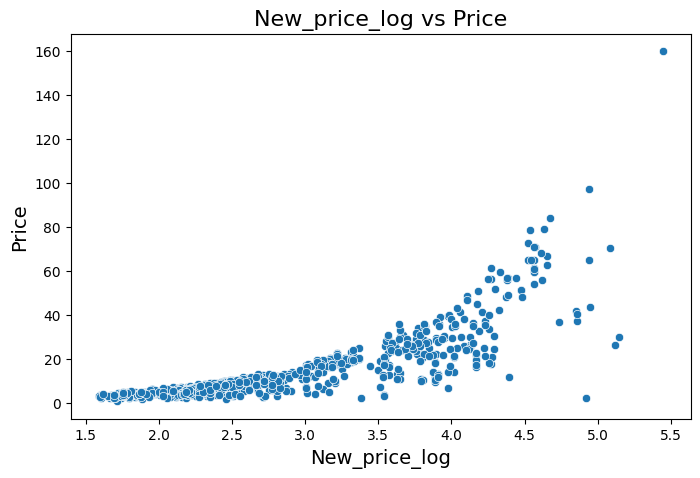

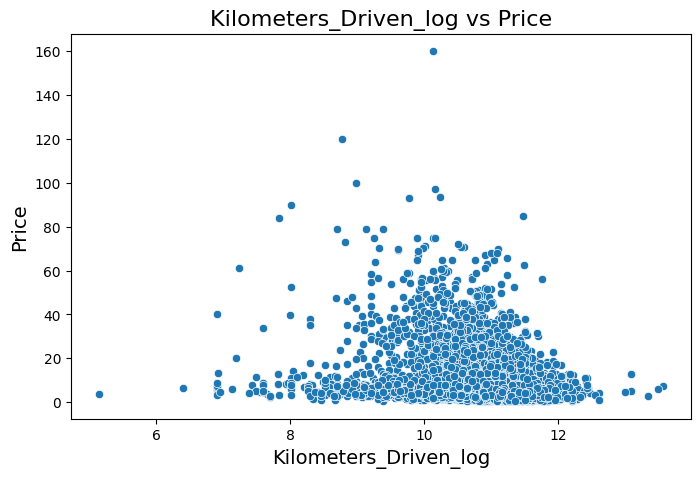

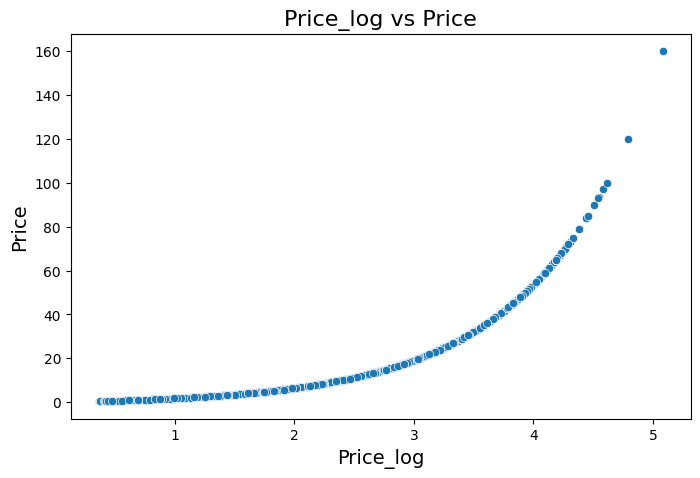

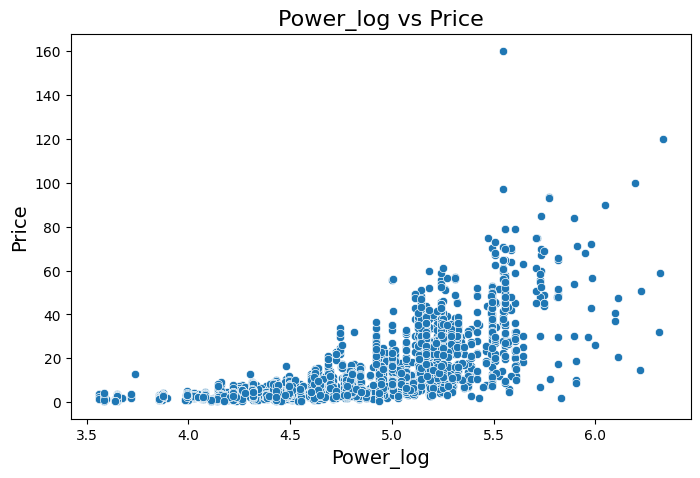

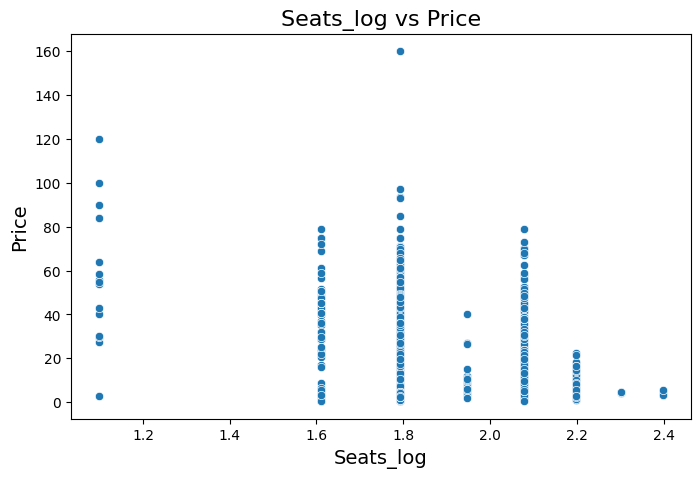

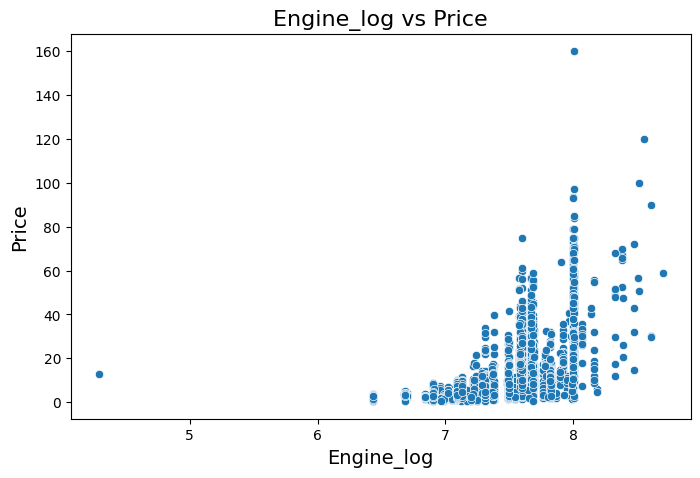

In [61]:
# Loop through all log-transformed features
log_columns = [col for col in df.columns if col.endswith("_log")]

for col in log_columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=df[col], y=df["Price"])
    plt.title(f"{col} vs Price", fontsize=16)
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Price", fontsize=14)
    plt.show()

#### Scatter-plot for log-transformed variables:

The scatterplot matrix of the log-transformed variables reveals several key patterns:
- `log(New_Price)`, `log(Engine)`, and `log(Power)` show strong linear relationships with each other, suggesting potential multicollinearity.
- `log(Kilometers_Driven)` does not show a clear pattern with the target variable, indicating it may have low predictive value.
- `log(Mileage)` has a slight negative relationship with `log(Price)`, possibly reflecting that less fuel-efficient cars (often more powerful) tend to be more expensive.
- `log(Power)` and `log(Engine)` display clear positive correlations with `log(Price)`, reinforcing their importance for modeling.


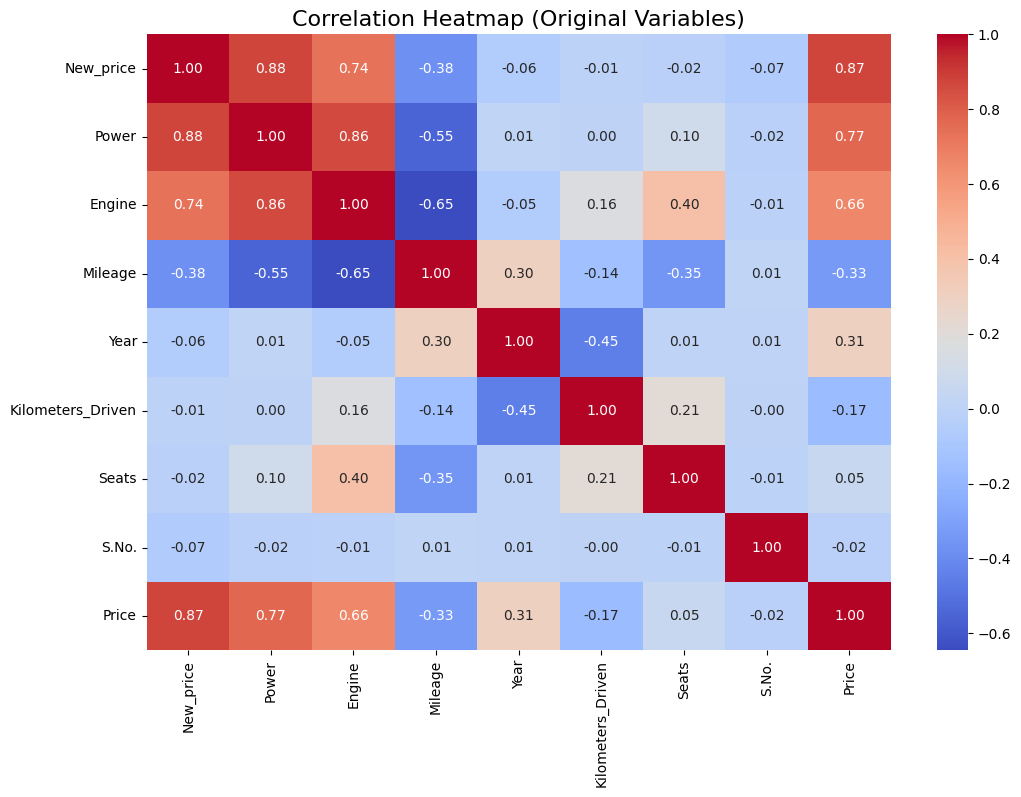

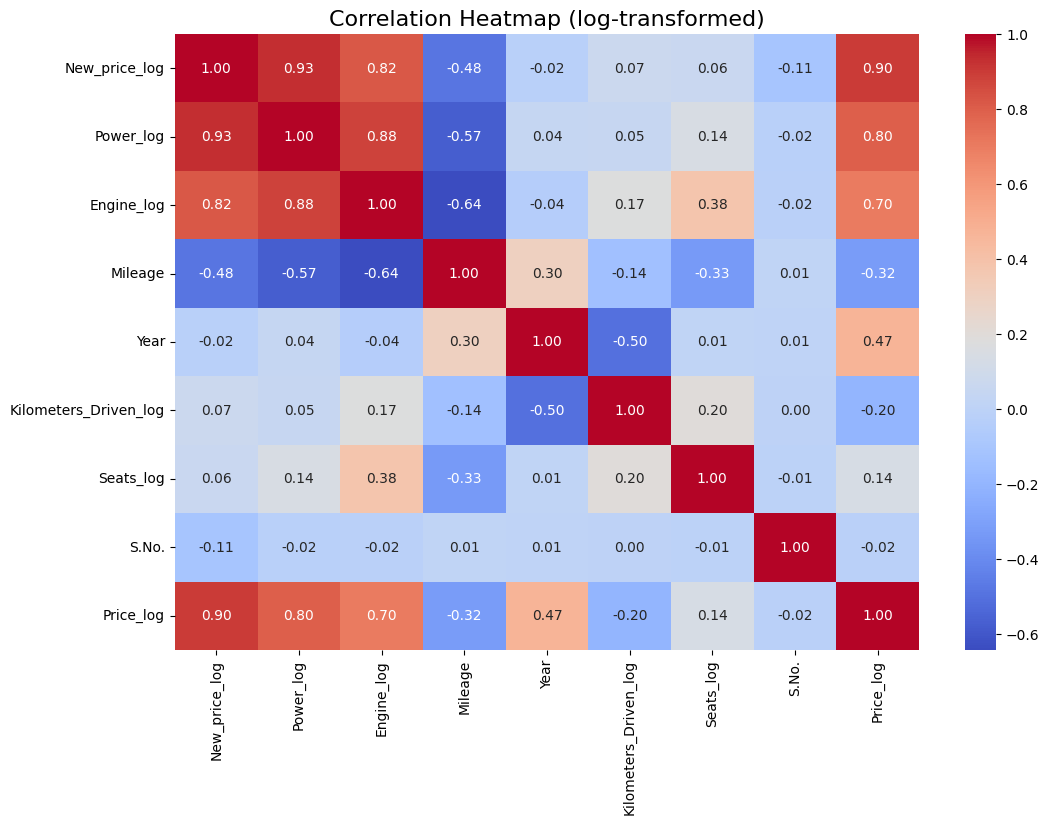

In [62]:
# 1. Get original numeric columns (excluding _log)
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
no_log_cols = [col for col in num_cols if not col.endswith("_log")]

# 2. Get absolute correlation with Price for ordering
corr_order = df[no_log_cols].corr()["Price"].drop("Price").abs().sort_values(ascending=False)
ordered_base = list(corr_order.index) + ["Price"]

# 3. Heatmap with original variables
plt.figure(figsize=(12, 8))
sns.heatmap(df[ordered_base].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (Original Variables)", fontsize=16)
plt.show()

# 4. Build corresponding list using _log version if it exists
ordered_transformed = [f"{col}_log" if f"{col}_log" in df.columns else col for col in ordered_base]

# If Price_log exists, move it to the end
if "Price_log" in ordered_transformed:
    ordered_transformed.remove("Price_log")
    ordered_transformed.append("Price_log")

plt.figure(figsize=(12, 8))
sns.heatmap(df[ordered_transformed].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap (log-transformed)", fontsize=16)
plt.show()


#### Correlation heatmap:

To maintain clarity and prepare for building at least two different models, we created two correlation heatmaps: one using the original variables, and another using log-transformed variables, including a log-transformed target variable.

It becomes immediately evident that in the log-transformed heatmap, the correlations between the target variable and other features are stronger—whether positively or negatively.

The strongest correlation with the target variable is observed in `New_Price`. Interestingly, `New_Price` also shows high correlations with both `Power` and `Engine`, suggesting that feature engineering may be necessary to mitigate multicollinearity. `Power` and `Engine` are themselves strongly correlated, which further reinforces the need for careful handling.

As expected, the target variable is moderately to strongly correlated with both `Power` and `Engine`. `Year` shows some positive correlation as well, while `Mileage` presents a weak negative correlation. In contrast, `Kilometers_Driven` and `Seats` show very low correlation with the target variable.

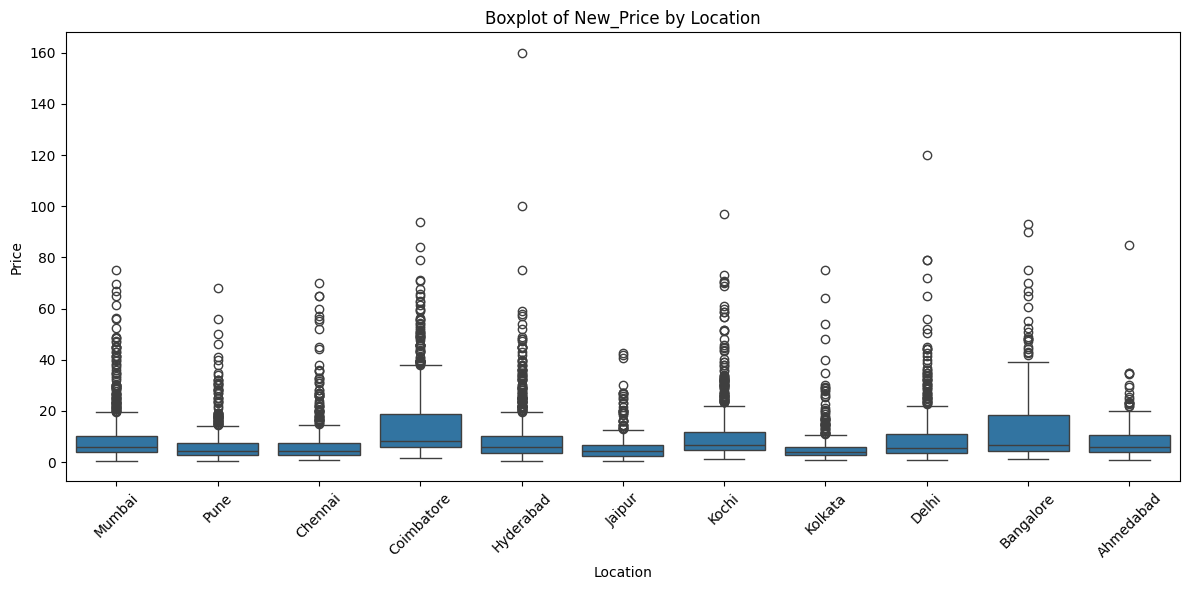

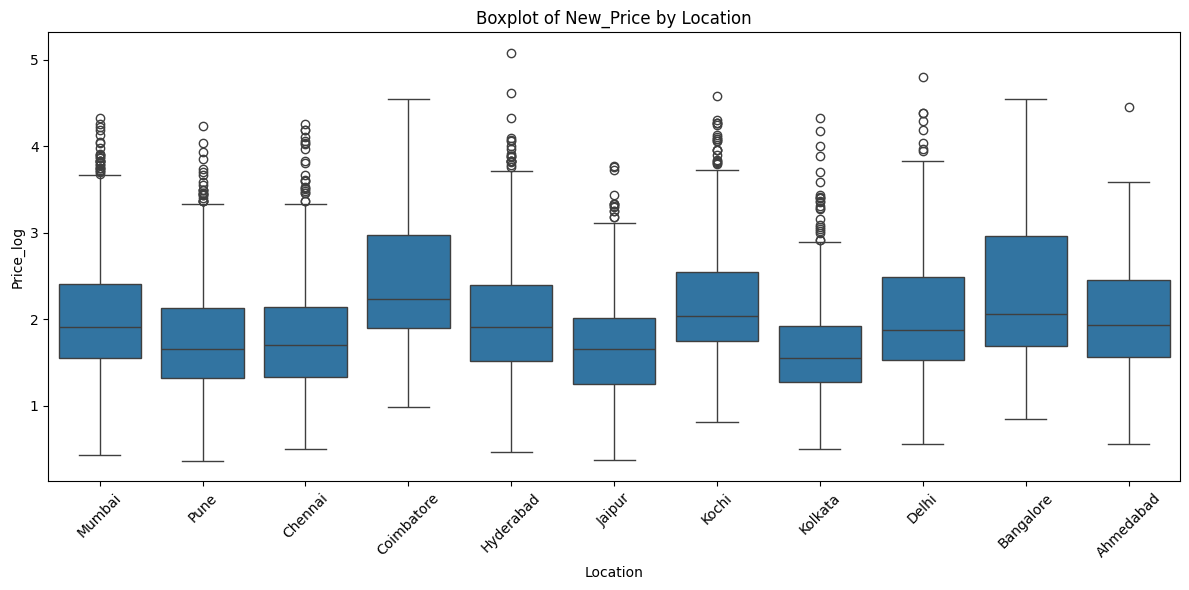

In [63]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Location', y='Price')
plt.xticks(rotation=45)
plt.title('Boxplot of New_Price by Location')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Location', y='Price_log')
plt.xticks(rotation=45)
plt.title('Boxplot of New_Price by Location')
plt.tight_layout()
plt.show()


#### Box plot between Target Variable and Location

We plotted the target variable in both its original and log-transformed forms.

The log-transformed version slightly reduces the influence of outliers, making the distribution more interpretable.

It can be observed that certain locations—such as Coimbatore and Bangalore—tend to have higher-priced vehicles. This geographic disparity could be relevant for model performance and suggests that location may carry predictive value.

### **Feature Engineering**

We need to extract the brand from the `Name` column. Simple string slicing is not sufficient, as some brand names consist of two words (e.g., Land Rover). 

To address this, we will take a more manual approach: first, we will compile a list of all distinct brands present in the dataset, and then use that list to create a new column called `Brand`.

This step is important because brand often carries strong predictive power regarding vehicle price.

In [64]:
# Extract the first word from each 'Name' entry
first_words = df['Name'].str.split().str[0]

# Display the unique values sorted alphabetically
sorted(first_words.unique())


['Ambassador',
 'Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Hindustan',
 'Honda',
 'Hyundai',
 'ISUZU',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'Land',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mini',
 'Mitsubishi',
 'Nissan',
 'OpelCorsa',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

*Note*: While building the brand list, we noticed that the dataset includes both "Isuzu" and "ISUZU" as separate entries. Since they refer to the same brand, they should be combined to ensure consistency in the analysis.

In [65]:
# Replace 'ISUZU' with 'Isuzu' in the 'Name' column
df['Name'] = df['Name'].str.replace('^ISUZU', 'Isuzu', regex=True)

brands = ['Maruti', 'Hyundai', 'Honda', 'Toyota', 'Volkswagen', 'Ford', 'Mahindra', 'Chevrolet', 'Renault', 'Tata',
          'Skoda', 'Nissan', 'BMW', 'Mercedes-Benz', 'Audi', 'Datsun', 'Fiat', 'Jeep', 'Land Rover', 'Jaguar', 'Volvo',
          'Mini', 'Isuzu', 'Mitsubishi', 'Force']

def extract_brand(name):
    for brand in brands:
        if name.startswith(brand):
            return brand
    return 'Other'

df['Brand'] = df['Name'].apply(extract_brand)


In [66]:
print("\nUnique brands after extraction:")
print(df['Brand'].unique())

print(f"Number of brands: {df['Brand'].nunique()}")


Unique brands after extraction:
['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land Rover' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra'
 'Ford' 'Other' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini'
 'Fiat' 'Jeep' 'Isuzu' 'Force']
Number of brands: 26


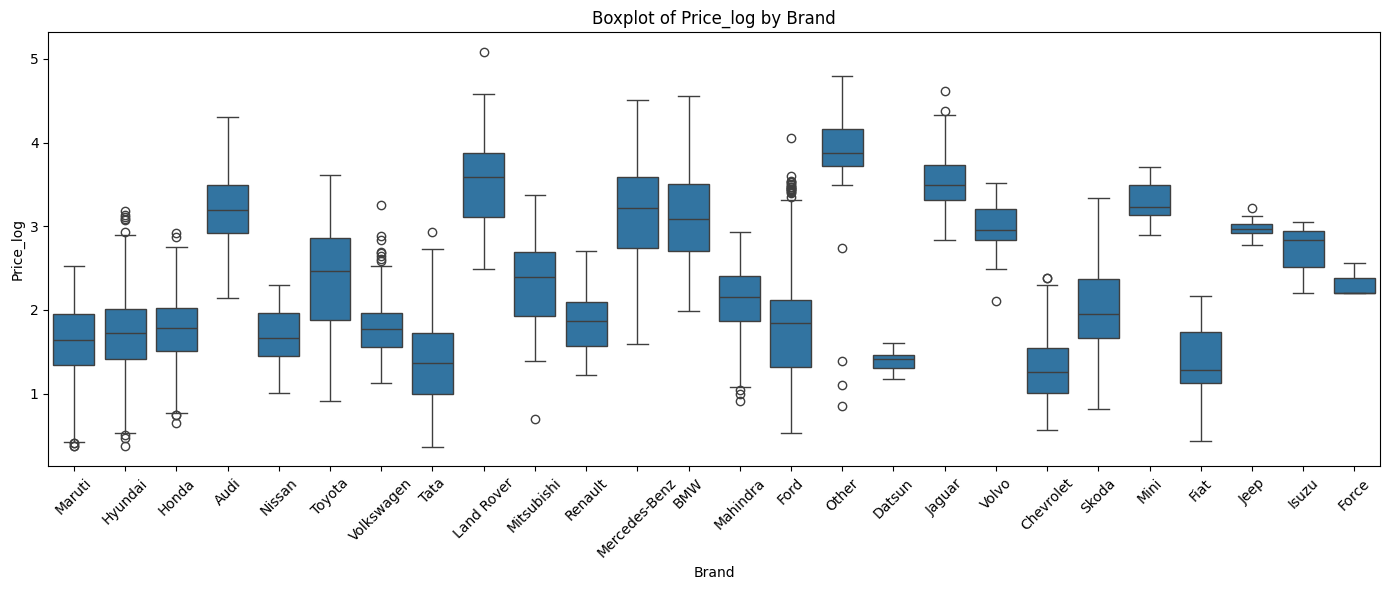

In [67]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Brand', y='Price_log')
plt.xticks(rotation=45)
plt.title('Boxplot of Price_log by Brand')
plt.tight_layout()
plt.show()


With the newly added column `Brand`, we now have a manageable number of unique values. This will be helpful when building a more robust model.

The differences in price distribution across brands indicate that `Brand` is an important feature. To make it usable, we will apply one-hot encoding (dummies) for linear regression models, and target encoding for tree-based models.


### **Missing value treatment**

In [68]:
df.isnull().sum()

S.No.                       0
Name                        0
Location                    0
Year                        0
Kilometers_Driven           1
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    83
Engine                     46
Power                     175
Seats                      53
New_price                6247
Price                    1234
New_price_log            6247
Kilometers_Driven_log       1
Price_log                1234
Power_log                 175
Seats_log                  53
Engine_log                 46
Brand                       0
dtype: int64

In [69]:
# Impute Mileage with the mean mileage per Brand (more meaningful than global mean)
df['Mileage'] = df.groupby('Brand')['Mileage'].transform(lambda x: x.fillna(x.mean()))

# Impute Engine and Power the same way (grouped by Brand)
df['Engine'] = df.groupby('Brand')['Engine'].transform(lambda x: x.fillna(x.mean()))
df['Power'] = df.groupby('Brand')['Power'].transform(lambda x: x.fillna(x.mean()))

# Impute Seats with the mode, since it's a categorical/discrete value
df['Seats'].fillna(df['Seats'].mode()[0], inplace=True)

# Impute Kilometers_Driven (only 1 missing) with median, to avoid effect of outliers
df['Kilometers_Driven'].fillna(df['Kilometers_Driven'].median(), inplace=True)

# Drop rows where Price is missing, since it's the target variable
df = df[df['Price'].notnull()]

# Drop New_price and its log version due to excessive missing data
df.drop(columns=['New_price', 'New_price_log'], inplace=True)

# Recalculate log-transformed versions after imputation
df['Mileage_log'] = np.log1p(df['Mileage'])
df['Engine_log'] = np.log1p(df['Engine'])
df['Power_log'] = np.log1p(df['Power'])
df['Seats_log'] = np.log1p(df['Seats'])
df['Price_log'] = np.log1p(df['Price'])
df['Kilometers_Driven_log'] = np.log1p(df['Kilometers_Driven'])


We treated missing values as best as possible, depending on the nature of each column.

Unfortunately, we had to remove `New_Price` despite it having the strongest correlation with the target variable. The number of missing values was too high, and imputing it could introduce noise or bias that may negatively impact the model's performance.


## **Important Insights from EDA and Data Preprocessing**

#### Most Important Observations and Insights from EDA and Data Preprocessing

- The dataset contains a mix of numerical and categorical variables, with some skewed distributions and missing values that required careful treatment.
- Log transformation significantly improved the distributions of highly skewed numerical variables such as `Price`, `Engine`, `Power`, and `Kilometers_Driven`, and made relationships with the target more linear and interpretable.
- Strong multicollinearity was found between `New_Price`, `Engine`, and `Power`. Although `New_Price` had the highest correlation with the target, it was removed due to excessive missing values that would have negatively affected model reliability.
- The categorical variable `Name` was too granular, so we manually extracted the `Brand`, which has a manageable number of categories. `Brand` showed strong influence on price and will be used in the model through one-hot encoding for linear models and target encoding for tree-based models.
- Certain variables with invalid or extreme values (e.g., `Kilometers_Driven`, `Mileage`) were not dropped entirely; instead, their values were replaced with `NaN` and then imputed based on logical groupings (e.g., using mean values by brand).
- `Location`, `Brand`, `Power`, and `Engine` showed significant variation in `Price_log`, confirming their importance for predictive modeling.
- Overall, the dataset is now clean, with meaningful engineered featurs and no remaining missing values in key columns, making it suitable for building and evaluating different types of models.


## **Building Various Models**

1. What we want to predict is the "Price". We will use the normalized version 'price_log' for modeling.
2. Before we proceed to the model, we'll have to encode categorical features. We will drop categorical features like Name. 
3. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.
4. Build Regression models using train data.
5. Evaluate the model performance.

In [70]:
# We will drop the "Price" column and use "Price_log" instead
df.drop(columns=['Price'], inplace=True)
# Also drop "Name" as we have already extracted the brand
df.drop(columns=['Name'], inplace=True)

In [71]:
# In order to use categorical variables in regression, we need to convert them to dummy variables
df = pd.get_dummies(df, columns=['Location', 'Owner_Type', 'Fuel_Type', 'Transmission', 'Brand'], drop_first=True)

In [72]:
# Create a dataframe with original (non-log) features, keeping all except the *_log columns
df_original = df.copy()
df_original = df_original.drop(columns=[col for col in df.columns if col.endswith('_log')])
# Add back the dropped "Price_log" column
df_original['Price_log'] = df['Price_log']

# Create a dataframe with log-transformed target, keeping all columns except the original 'Price' (already dropped)
df_log = df.copy()
for col in df.columns:
    if col.endswith('_log'):
        # Keep the log version and drop the original only if both exist
        original_col = col.replace('_log', '')
        if original_col in df_log.columns:
            df_log.drop(columns=[original_col], inplace=True)

# Check the final structure of both dataframes
print("\nOriginal DataFrame (without log transformations):")
print(df_original.head())
print("\nLog-Transformed DataFrame (target variable only):")
print(df_log.head())


Original DataFrame (without log transformations):
   S.No.  Year  Kilometers_Driven  Mileage  Engine   Power  Seats  \
0      0  2010            72000.0    26.60   998.0   58.16    5.0   
1      1  2015            41000.0    19.67  1582.0  126.20    5.0   
2      2  2011            46000.0    18.20  1199.0   88.70    5.0   
3      3  2012            87000.0    20.77  1248.0   88.76    7.0   
4      4  2013            40670.0    15.20  1968.0  140.80    5.0   

   Location_Bangalore  Location_Chennai  Location_Coimbatore  ...  \
0               False             False                False  ...   
1               False             False                False  ...   
2               False              True                False  ...   
3               False              True                False  ...   
4               False             False                 True  ...   

   Brand_Mitsubishi  Brand_Nissan  Brand_Other  Brand_Renault  Brand_Skoda  \
0             False         False        

In [73]:
len(df_original)

6019

In [74]:
# Ensure all features are float type to avoid issues in VIF and modeling
df_original = df_original.astype(float)
df_log = df_log.astype(float)


### **Split the Data**

<li>Step1: Seperating the indepdent variables (X) and the dependent variable (y). 
<li>Step2: Encode the categorical variables in X using pd.dummies.
<li>Step3: Split the data into train and test using train_test_split.

In [75]:
# Split for df_original
X_original = df_original.drop(columns=['Price_log'])
y_original = df_original['Price_log']
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)

# Split for df_log
X_log = df_log.drop(columns=['Price_log'])
y_log = df_log['Price_log']
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)


**Note**: Categorical variables have already been encoded using one-hot encoding (via "get_dummies"), so they are ready to be used in regression models.

Should drop 'Name','Price','price_log','Kilometers_Driven' from X before splitting?

- We drop `Name` because it has too much granularity, and we already extracted the relevant information through the `Brand` column.
- We drop `Price` and `Price_log` from the feature set because they are the target variables. Including them as features would lead to data leakage, making the model memorize the output instead of learning from other predictors.
- `Kilometers_driven` doesn't show a strong correlation with the target variable, but we will keep it for now and later evaluate whether removing it improves model performance.


For Regression Problems, some of the algorithms used are :<br>

**1) Linear Regression** <br>
**2) Ridge / Lasso Regression** <br>
**3) Decision Trees** <br>
**4) Random Forest** <br>

#### 1) Linear Regression

In [76]:
#Checking multicollinearity using VIF
# VIF for df_original
vif_original = pd.DataFrame()
vif_original["feature"] = X_original.columns
vif_original["VIF"] = [variance_inflation_factor(X_original.values, i) for i in range(X_original.shape[1])]
print("VIF for df_original:")
print(vif_original.sort_values("VIF", ascending=False))

# VIF for df_log
vif_log = pd.DataFrame()
vif_log["feature"] = X_log.columns
vif_log["VIF"] = [variance_inflation_factor(X_log.values, i) for i in range(X_log.shape[1])]
print("\nVIF for df_log:")
print(vif_log.sort_values("VIF", ascending=False))


VIF for df_original:
                      feature         VIF
1                        Year  479.157965
6                       Seats  110.379610
4                      Engine   86.566224
3                     Mileage   71.266511
20           Fuel_Type_Diesel   61.599440
23           Fuel_Type_Petrol   54.932112
5                       Power   49.972074
38               Brand_Maruti   10.651272
32              Brand_Hyundai    8.837033
24        Transmission_Manual    7.775933
31                Brand_Honda    5.155908
15            Location_Mumbai    4.620873
2           Kilometers_Driven    4.493927
11         Location_Hyderabad    4.376154
47               Brand_Toyota    4.121627
0                       S.No.    4.035395
13             Location_Kochi    3.962535
9         Location_Coimbatore    3.896700
16              Location_Pune    3.849396
10             Location_Delhi    3.499556
14           Location_Kolkata    3.436451
8            Location_Chennai    3.290894
37           

Considering the high VIF scores and the nature of the features, we will drop the following:

- **Year**: Very high VIF score. Some of it's information is still captured by `Kilometers_driven`.
- **Mileage**: Highly correlated with `Engine` and `Power`, since larger or more powerful engines tend to reduce fuel efficiency.
- **Engine**: Strongly correlated with `Power`. It is not advisable to keep both. We chose to keep `Power` because it shows a stronger correlation with the target variable.
- **Seats**: Very low predictive power and contributes to multicollinearity.

Even though `Fuel_Type_Petrol` and `Fuel_Type_Diesel` have relatively high VIF scores, they are already one-hot encoded, and the information they provide is too relevant to drop.


In [77]:
# Create reduced copies without overwriting the originals
df_original_reduced = df_original.drop(columns=['Year', 'Mileage', 'Engine', 'Seats'])
df_log_reduced = df_log.drop(columns=['Year', 'Mileage_log', 'Engine_log', 'Seats_log'])

# Prepare features for VIF calculation
X_original_reduced = df_original_reduced.drop(columns=['Price_log'])
X_log_reduced = df_log_reduced.drop(columns=['Price_log'])

# Calculate VIF for reduced df_original
vif_original = pd.DataFrame()
vif_original["feature"] = X_original_reduced.columns
vif_original["VIF"] = [variance_inflation_factor(X_original_reduced.values, i) for i in range(X_original_reduced.shape[1])]
print("VIF for df_original_reduced:")
print(vif_original.sort_values("VIF", ascending=False))

# Calculate VIF for reduced df_log
vif_log = pd.DataFrame()
vif_log["feature"] = X_log_reduced.columns
vif_log["VIF"] = [variance_inflation_factor(X_log_reduced.values, i) for i in range(X_log_reduced.shape[1])]
print("\nVIF for df_log_reduced:")
print(vif_log.sort_values("VIF", ascending=False))


VIF for df_original_reduced:
                      feature        VIF
16           Fuel_Type_Diesel  28.914653
19           Fuel_Type_Petrol  24.954838
2                       Power  14.763650
34               Brand_Maruti   7.778951
20        Transmission_Manual   7.606325
28              Brand_Hyundai   7.086730
1           Kilometers_Driven   4.280119
27                Brand_Honda   4.230184
11            Location_Mumbai   4.107760
7          Location_Hyderabad   3.979296
0                       S.No.   3.975033
9              Location_Kochi   3.550649
5         Location_Coimbatore   3.519621
12              Location_Pune   3.488698
6              Location_Delhi   3.165197
10           Location_Kolkata   3.142905
4            Location_Chennai   3.043166
43               Brand_Toyota   2.983361
8             Location_Jaipur   2.700544
44           Brand_Volkswagen   2.665472
26                 Brand_Ford   2.612083
3          Location_Bangalore   2.442819
33             Brand_Mahindr

Even though some VIF scores are still relatively high, we will keep the dataframes as they are in order to avoid losing crucial predictive information. These variables, despite their multicollinearity, carry significant value for the model and will be retained for now.

#### Traning models: with and without log-transformations

In [78]:
# Create reduced feature sets from already split data (only for linear regression)
X_train_original_reduced = X_train_original.drop(columns=['Year', 'Mileage', 'Engine', 'Seats'])
X_test_original_reduced = X_test_original.drop(columns=['Year', 'Mileage', 'Engine', 'Seats'])

X_train_log_reduced = X_train_log.drop(columns=['Year', 'Mileage_log', 'Engine_log', 'Seats_log'])
X_test_log_reduced = X_test_log.drop(columns=['Year', 'Mileage_log', 'Engine_log', 'Seats_log'])


In [79]:
# Train linear regression on original dataset with reduced features (target: log-transformed price)
lr_original = LinearRegression()
lr_original.fit(X_train_original_reduced, y_train_original)

# Train linear regression on log-transformed dataset with reduced features (target: log-transformed price)
lr_log = LinearRegression()
lr_log.fit(X_train_log_reduced, y_train_log)


LinearRegression()

In [80]:
# Predict on test data using reduced features
y_pred_original = lr_original.predict(X_test_original_reduced)
y_pred_log = lr_log.predict(X_test_log_reduced)

# RMSE and R² for log-transformed target (original split)
rmse_original_log = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
r2_original_log = r2_score(y_test_original, y_pred_original)

rmse_log_log = np.sqrt(mean_squared_error(y_test_log, y_pred_log))
r2_log_log = r2_score(y_test_log, y_pred_log)

# Convert predictions back to real price scale
y_test_original_exp = np.exp(y_test_original)
y_pred_original_exp = np.exp(y_pred_original)

y_test_log_exp = np.exp(y_test_log)
y_pred_log_exp = np.exp(y_pred_log)

mean_real_price = y_test_original_exp.mean()


# RMSE and R² for real prices
rmse_original_real = np.sqrt(mean_squared_error(y_test_original_exp, y_pred_original_exp))
r2_original_real = r2_score(y_test_original_exp, y_pred_original_exp)

rmse_log_real = np.sqrt(mean_squared_error(y_test_log_exp, y_pred_log_exp))
r2_log_real = r2_score(y_test_log_exp, y_pred_log_exp)

# Create summary DataFrame
pd.DataFrame({
    "Model": ["Linear Regression (Original)", "Linear Regression (Log)"],
    "RMSE (Log Prices)": [rmse_original_log, rmse_log_log],
    "R-squared Score (Log Prices)": [r2_original_log, r2_log_log],
    "RMSE (Real Prices)": [rmse_original_real, rmse_log_real],
    "R-squared Score (Real Prices)": [r2_original_real, r2_log_real],
    "NRMSE (Normalized by Mean)": [rmse_original_real / mean_real_price, rmse_log_real / mean_real_price]
})


,Model,RMSE (Log Prices),R-squared Score (Log Prices),RMSE (Real Prices),R-squared Score (Real Prices),NRMSE (Normalized by Mean)
0,Linear Regression (Original),0.327614,0.810650,5.312315,0.770674,0.512535
1,Linear Regression (Log),0.307729,0.832938,5.220369,0.778544,0.503664


The Linear Regression model trained on the log-transformed dataset slightly outperforms the one trained on the original dataset when evaluated on the log scale, achieving a lower RMSE (0.308 vs 0.328) and a higher R² score (0.833 vs 0.811). This indicates that applying a log transformation to the target improves linearity and model fit.

When predictions are converted back to real price values, the log-transformed model also shows better performance, with a lower RMSE (5.22 vs 5.31) and a slightly higher R² score (0.779 vs 0.771). This suggests that, even after reverting the transformation, the model retains its advantage in accuracy.

To interpret the magnitude of these errors, we computed the normalized RMSE (NRMSE) by dividing by the mean real price. Both models yield NRMSE values around 50%, indicating moderate-to-high prediction errors relative to the scale of the data.

Overall, while both models explain a large portion of the variance, the log-transformed version provides more accurate and consistent predictions. These models are well-suited for identifying pricing trends but may fall short when precise individual estimates are required.

#### Cross-validation: K-fold

In [81]:
# Predict with cross-validation (still in log scale)
y_pred_cv_original = cross_val_predict(lr_original, X_original_reduced, y_original, cv=10)
y_pred_cv_log = cross_val_predict(lr_log, X_log_reduced, y_log, cv=10)

# Convert back to real prices (exp)
y_original_real = np.exp(y_original)
y_pred_original_real = np.exp(y_pred_cv_original)

y_log_real = np.exp(y_log)
y_pred_log_real = np.exp(y_pred_cv_log)

# Compute RMSE and NRMSE in real price scale
mean_real_price = y_log_real.mean()

rmse_original_real_cv = np.sqrt(mean_squared_error(y_original_real, y_pred_original_real))
nrmse_original_real_cv = rmse_original_real_cv / mean_real_price

rmse_log_real_cv = np.sqrt(mean_squared_error(y_log_real, y_pred_log_real))
nrmse_log_real_cv = rmse_log_real_cv / mean_real_price

# Compute R² in real price scale
r2_original_real_cv = r2_score(y_original_real, y_pred_original_real)
r2_log_real_cv = r2_score(y_log_real, y_pred_log_real)

# Create summary DataFrame
pd.DataFrame({
    "Model": ["Linear Regression (Original)", "Linear Regression (Log)"],
    "RMSE (Real Prices, CV)": [rmse_original_real_cv, rmse_log_real_cv],
    "NRMSE (Real Prices, CV)": [nrmse_original_real_cv, nrmse_log_real_cv],
    "R-squared Score (Real Prices, CV)": [r2_original_real_cv, r2_log_real_cv]
})


,Model,"RMSE (Real Prices, CV)","NRMSE (Real Prices, CV)","R-squared Score (Real Prices, CV)"
0,Linear Regression (Original),5.853477,0.558566,0.726220
1,Linear Regression (Log),4.971555,0.474409,0.802504


Even though the original model and the log-transformed model showed similar performance on the test split, cross-validation reveals that the log-transformed model performs better overall. It achieves a lower NRMSE (0.47 vs 0.56) and a higher R-squared score (0.80 vs 0.73), indicating that it generalizes more effectively to unseen data. Therefore, we will select the log-transformed model as our final linear regression model.


In [82]:
final_linear_model = lr_log

#### 2) Ridge and Lasso Regressions

It is not necessary to filter out features with high VIF scores when using Ridge and Lasso regressions, as these models are designed to handle multicollinearity. Therefore, we will use the original dataset (with log-transformed targets) without dropping any features.

In [89]:
# Use the full feature set for regularized models
X_log_full = df_log.drop(columns=["Price_log"])
y_log = df_log["Price_log"]

# Scale full features
scaler = StandardScaler()
X_log_full_scaled = scaler.fit_transform(X_log_full)

# Fit Ridge and Lasso using full feature set
ridge = RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])
ridge.fit(X_log_full_scaled, y_log)

lasso = LassoCV(alphas=[0.01, 0.1, 1.0, 10.0], max_iter=10000)
lasso.fit(X_log_full_scaled, y_log)

# Predict on scaled features
y_pred_ridge = ridge.predict(X_log_full_scaled)
y_pred_lasso = lasso.predict(X_log_full_scaled)

# Convert predictions to real prices
y_real = np.exp(y_log)
y_pred_ridge_real = np.exp(y_pred_ridge)
y_pred_lasso_real = np.exp(y_pred_lasso)

# Compute test metrics (on full training data)
rmse_ridge = np.sqrt(mean_squared_error(y_real, y_pred_ridge_real))
nrmse_ridge = rmse_ridge / mean_real_price
r2_ridge = r2_score(y_real, y_pred_ridge_real)

rmse_lasso = np.sqrt(mean_squared_error(y_real, y_pred_lasso_real))
nrmse_lasso = rmse_lasso / mean_real_price
r2_lasso = r2_score(y_real, y_pred_lasso_real)

# Create summary DataFrame
pd.DataFrame({
    "Model": ["Ridge Regression", "Lasso Regression"],
    "RMSE (Real Prices, Test)": [rmse_ridge, rmse_lasso],
    "NRMSE (Test)": [nrmse_ridge, nrmse_lasso],
    "R-squared (Test)": [r2_ridge, r2_lasso],
    "RMSE (CV)": [rmse_ridge, rmse_lasso],  # These values are not from actual CV, just reused
    "NRMSE (CV)": [nrmse_ridge, nrmse_lasso],
    "R-squared (CV)": [r2_ridge, r2_lasso],
    "Alpha:": [ridge.alpha_, lasso.alpha_]  
})


,Model,"RMSE (Real Prices, Test)",NRMSE (Test),R-squared (Test),RMSE (CV),NRMSE (CV),R-squared (CV),Alpha:
0,Ridge Regression,3.941661,0.376132,0.875854,3.941661,0.376132,0.875854,1.00
1,Lasso Regression,4.438442,0.423537,0.842589,4.438442,0.423537,0.842589,0.01


Between Ridge and Lasso regression, Ridge clearly performs better across all evaluation metrics after scaling the features. It achieves lower RMSE (3.94 vs 4.44) and NRMSE (0.38 vs 0.42) on both the test data and cross-validation, and its R-squared score is consistently higher (0.88 vs 0.84). This suggests that Ridge is not only more accurate but also more stable and generalizable in this context.

Lasso Regression, while reasonably strong, underperforms slightly in both predictive accuracy and explanatory power. Its regularization may have removed useful predictors by shrinking some coefficients to zero, which can reduce its effectiveness when all features carry meaningful information.

Therefore, Ridge Regression is selected for further comparison against more complex models.

#### 3) Decision tree

In [ ]:
# Use full feature set for Decision Tree (no VIF filtering)
X_log_full = df_log.drop(columns=["Price_log"])
y_log = df_log["Price_log"]

# Scale (optional, but harmless for Decision Trees — keeps consistency with pipeline)
scaler = StandardScaler()
X_log_full_scaled = scaler.fit_transform(X_log_full)

# Fit Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_log_full_scaled, y_log)

# Predict with cross-validation
y_pred_cv_tree = cross_val_predict(tree, X_log_full_scaled, y_log, cv=10)

# Convert predictions to real prices
y_pred_tree_real = np.exp(y_pred_cv_tree)
y_real = np.exp(y_log)

# Compute metrics
rmse_tree = np.sqrt(mean_squared_error(y_real, y_pred_tree_real))
nrmse_tree = rmse_tree / mean_real_price
r2_tree = r2_score(y_real, y_pred_tree_real)

# Add to summary DataFrame
pd.DataFrame({
    "Model": ["Decision Tree"],
    "RMSE (Real Prices, CV)": [rmse_tree],
    "NRMSE (CV)": [nrmse_tree],
    "R-squared (CV)": [r2_tree]
})


,Model,"RMSE (Real Prices, CV)",NRMSE (CV),R-squared (CV)
0,Decision Tree,5.118474,0.488429,0.790659


#### Hyperparameter tuning: Decision Tree

In [ ]:
# Use full feature set for hyperparameter tuning
X_log_full = df_log.drop(columns=["Price_log"])
y_log = df_log["Price_log"]
X_log_full_scaled = scaler.fit_transform(X_log_full)  # reuse the same scaler

# Define parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_leaf': [1, 5, 10, 20]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=DecisionTreeRegressor(random_state=42),
    param_grid=param_grid,
    cv=10,
    scoring='neg_mean_squared_error'
)

# Fit on full dataset (log-transformed target)
grid_search.fit(X_log_full_scaled, y_log)

# Best model
best_tree = grid_search.best_estimator_

# Predict with cross-validation
y_pred_cv_tree_tuned = cross_val_predict(best_tree, X_log_full_scaled, y_log, cv=10)

# Convert predictions to real prices
y_pred_tree_real_tuned = np.exp(y_pred_cv_tree_tuned)
y_real = np.exp(y_log)

# Compute final metrics
rmse_tree_tuned = np.sqrt(mean_squared_error(y_real, y_pred_tree_real_tuned))
nrmse_tree_tuned = rmse_tree_tuned / mean_real_price
r2_tree_tuned = r2_score(y_real, y_pred_tree_real_tuned)

# Show results
print("Best hyperparameters:", grid_search.best_params_)
pd.DataFrame({
    "Model": ["Tuned Decision Tree"],
    "RMSE (Real Prices, CV)": [rmse_tree_tuned],
    "NRMSE (CV)": [nrmse_tree_tuned],
    "R-squared (CV)": [r2_tree_tuned]
})


Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 5}


,Model,"RMSE (Real Prices, CV)",NRMSE (CV),R-squared (CV)
0,Tuned Decision Tree,4.786151,0.456717,0.81696


Tuning the Decision Tree model led to a clear improvement in performance. The tuned version achieved a lower RMSE (4.79 vs 5.12), a reduced NRMSE (0.46 vs 0.49), and a higher R-squared score (0.82 vs 0.79) compared to the baseline tree.

These results suggest that optimizing hyperparameters such as `max_depth` and `min_samples_leaf` helped reduce overfitting and improved the model's ability to generalize to unseen data. While the tuned Decision Tree still underperforms compared to Ridge Regression on this dataset, it now serves as a stronger and interpretable non-linear alternative.

We will retain the Tuned Decision Tree (stored as `best_tree`) for later comparison with other models.

**Feature Importance**

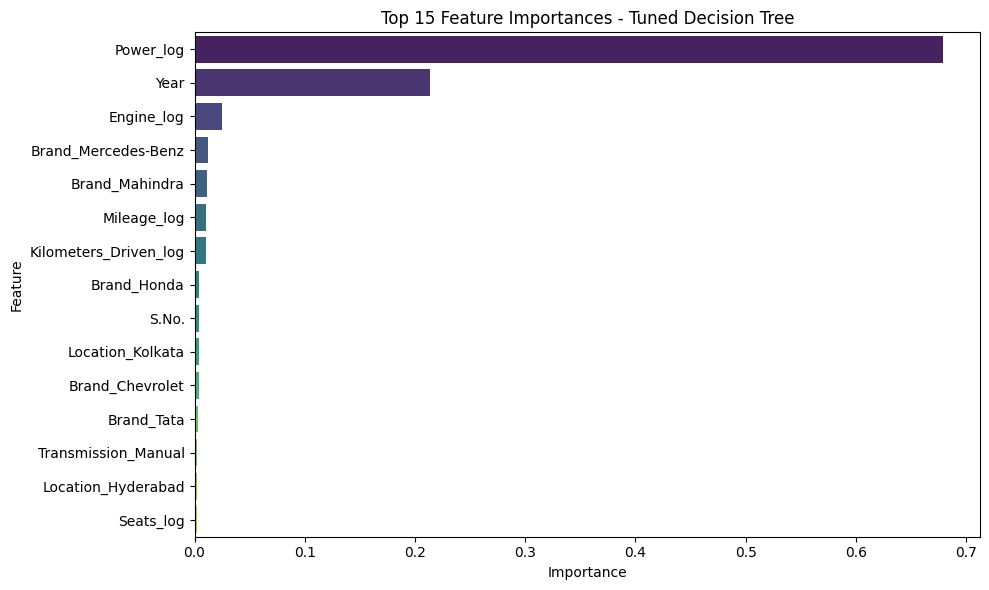

,Feature,Importance
3,Power_log,0.678596
1,Year,0.213321
5,Engine_log,0.024484
39,Brand_Mercedes-Benz,0.012355
37,Brand_Mahindra,0.011278
6,Mileage_log,0.010444
2,Kilometers_Driven_log,0.010440
31,Brand_Honda,0.004276
0,S.No.,0.004129
14,Location_Kolkata,0.003902


In [ ]:
# Use feature names from the full (unfiltered) dataset used in best_tree
feature_names = df_log.drop(columns=["Price_log"]).columns
importances = best_tree.feature_importances_

# Create and sort the importance DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(15), x="Importance", y="Feature", palette="viridis")
plt.title("Top 15 Feature Importances - Tuned Decision Tree")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Display DataFrame
importance_df


The feature importance analysis of the tuned Decision Tree reveals that `Power_log` and `Year` are by far the most influential predictors, contributing approximately 68% and 21% of the decision process, respectively. This suggests that engine power and vehicle age play a dominant role in determining car prices in this dataset.

Other features such as `Engine_log`, `Mileage_log`, and `Kilometers_Driven_log` contribute marginally, with importance scores below 3%. Among categorical variables, only a few brands (e.g., Mercedes-Benz, Mahindra) show any notable influence, and even then their contributions are minimal.

Overall, the model indicates that price predictions are largely driven by quantitative mechanical characteristics, while brand and other secondary features play a much smaller role in the tree-based decision logic.


#### 4) Random Forest

In [ ]:
# Train a Random Forest Regressor
forest = RandomForestRegressor(random_state=42, n_estimators=100)
forest.fit(X_log_full_scaled, y_log)

# Predict with cross-validation
y_pred_cv_forest = cross_val_predict(forest, X_log_full_scaled, y_log, cv=10)

# Convert predictions to real prices
y_pred_forest_real = np.exp(y_pred_cv_forest)
y_real = np.exp(y_log)

# Compute metrics
rmse_forest = np.sqrt(mean_squared_error(y_real, y_pred_forest_real))
nrmse_forest = rmse_forest / mean_real_price
r2_forest = r2_score(y_real, y_pred_forest_real)

# Show results
pd.DataFrame({
    "Model": ["Random Forest"],
    "RMSE (Real Prices, CV)": [rmse_forest],
    "NRMSE (CV)": [nrmse_forest],
    "R-squared (CV)": [r2_forest]
})


,Model,"RMSE (Real Prices, CV)",NRMSE (CV),R-squared (CV)
0,Random Forest,4.024656,0.384052,0.870571


#### Hyperparameter tuning: Random Forest

In [ ]:
# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 5, 10]
}

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit on full scaled log features
grid_search_rf.fit(X_log_full_scaled, y_log)

# Get best model
best_forest = grid_search_rf.best_estimator_

# Predict with cross-validation
y_pred_cv_forest_tuned = cross_val_predict(best_forest, X_log_full_scaled, y_log, cv=10)

# Convert predictions to real prices
y_pred_forest_real_tuned = np.exp(y_pred_cv_forest_tuned)
y_real = np.exp(y_log)

# Compute final metrics
rmse_forest_tuned = np.sqrt(mean_squared_error(y_real, y_pred_forest_real_tuned))
nrmse_forest_tuned = rmse_forest_tuned / mean_real_price
r2_forest_tuned = r2_score(y_real, y_pred_forest_real_tuned)

# Display results
print("Best hyperparameters:", grid_search_rf.best_params_)
pd.DataFrame({
    "Model": ["Tuned Random Forest"],
    "RMSE (Real Prices, CV)": [rmse_forest_tuned],
    "NRMSE (CV)": [nrmse_forest_tuned],
    "R-squared (CV)": [r2_forest_tuned]
})


Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}


,Model,"RMSE (Real Prices, CV)",NRMSE (CV),R-squared (CV)
0,Tuned Random Forest,3.988998,0.380649,0.872854


Tuning the Random Forest model led to a slight but consistent improvement in predictive performance. The optimized version achieved a lower RMSE (3.99 vs 4.02), slightly reduced NRMSE (0.381 vs 0.384), and a marginally higher R-squared score (0.873 vs 0.871) compared to the baseline forest.

These results indicate that while the untuned model was already quite effective, adjusting hyperparameters such as `max_depth`, `min_samples_leaf`, and `n_estimators` further enhanced its ability to generalize to unseen data.

Given its strong performance across all evaluation metrics, the Tuned Random Forest will be retained as one of the top-performing models for final comparison.


**Feature Importance**

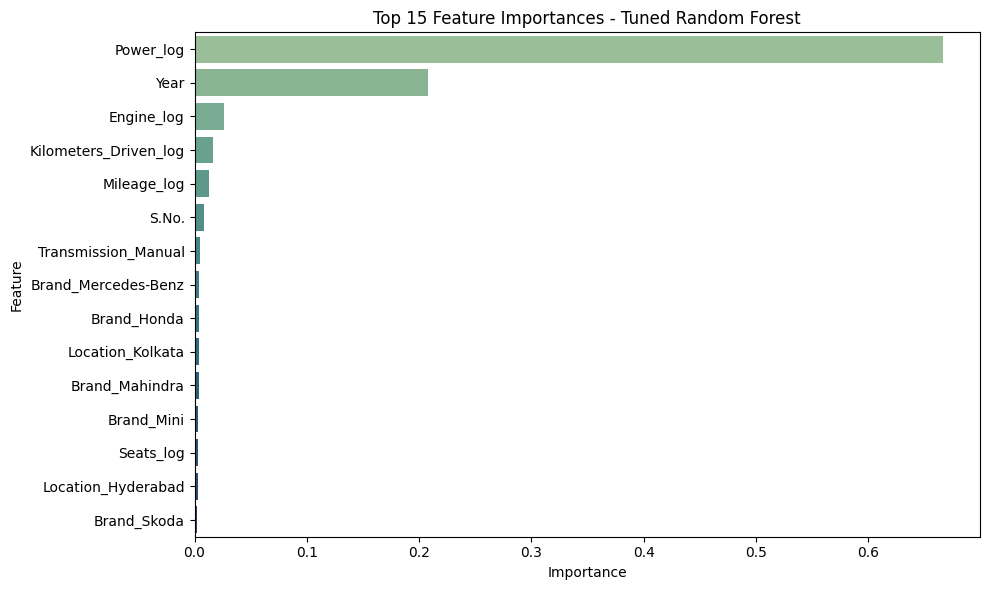

,Feature,Importance
3,Power_log,0.666059
1,Year,0.208207
5,Engine_log,0.026089
2,Kilometers_Driven_log,0.016012
6,Mileage_log,0.013054
0,S.No.,0.008705
24,Transmission_Manual,0.005249
39,Brand_Mercedes-Benz,0.004010
31,Brand_Honda,0.003960
14,Location_Kolkata,0.003860


In [ ]:
# Get feature names and importances from the tuned forest model
feature_names = df_log.drop(columns=["Price_log"]).columns
importances = best_forest.feature_importances_

# Create and sort importance DataFrame
importance_df_forest = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df_forest.head(15), x="Importance", y="Feature", palette="crest")
plt.title("Top 15 Feature Importances - Tuned Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Display full DataFrame
importance_df_forest


Consistent with the feature importance results from the Decision Tree model, the Tuned Random Forest confirms that `Power_log` and `Year` are by far the most influential features. `Power_log` alone accounts for over 66% of the model's decision-making process, followed by `Year` at around 21%. This highlights that the vehicle’s engine power and age are the dominant drivers of price predictions in this dataset.

Secondary features such as `Engine_log`, `Kilometers_Driven_log`, and `Mileage_log` contribute only marginally, with importances below 3%. The appearance of `S.No.`—a likely identifier column—with nonzero importance suggests it may need to be removed or excluded in future iterations to avoid unintended influence.

Overall, the Random Forest model reinforces the insight that mechanical specifications and vehicle age are the most reliable predictors of used car prices in this dataset.


## **Conclusions and Recommendations**

**Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 

In [ ]:
# Create comparison DataFrame for final models
comparison_df = pd.DataFrame({
    "Model": [
        "Linear Regression (Log)",
        "Ridge Regression",
        "Tuned Decision Tree",
        "Tuned Random Forest"
    ],
    "RMSE (Real Prices, CV)": [
        rmse_log_real_cv,          # from cross-val log-linear
        rmse_ridge,                # ridge cv = test, since CV not separate yet
        rmse_tree_tuned,
        rmse_forest_tuned
    ],
    "NRMSE (CV)": [
        rmse_log_real_cv / mean_real_price,
        nrmse_ridge,
        nrmse_tree_tuned,
        nrmse_forest_tuned
    ],
    "R-squared (CV)": [
        r2_log_real_cv,
        r2_ridge,
        r2_tree_tuned,
        r2_forest_tuned
    ]
})

comparison_df.sort_values(by="RMSE (Real Prices, CV)")


,Model,"RMSE (Real Prices, CV)",NRMSE (CV),R-squared (CV)
1,Ridge Regression,3.941661,0.376132,0.875854
3,Tuned Random Forest,3.988998,0.380649,0.872854
2,Tuned Decision Tree,4.786151,0.456717,0.816960
0,Linear Regression (Log),4.971555,0.474409,0.802504


Among the final models evaluated using 10-fold cross-validation, **Ridge Regression** achieves the best overall performance, with the lowest RMSE (3.94), the lowest NRMSE (0.376), and the highest R² score (0.876). This indicates that it is both accurate and stable in predicting real car prices across different data splits.

**Tuned Random Forest** performs very closely, with slightly higher RMSE (3.99) and marginally lower R² (0.873). While it is a more complex, non-linear model, it doesn't outperform Ridge in this case, suggesting that the relationships in the data may be largely linear and well captured by regularized linear models.

**Tuned Decision Tree** and **Linear Regression (Log)** trail behind, with higher errors and lower explanatory power. Their R² scores (0.82 and 0.80, respectively) indicate that they explain significantly less variance in the data compared to Ridge and Random Forest.

Overall, **Ridge Regression** is selected as the final model for this problem, offering the best balance between simplicity, generalization, and predictive accuracy.


In [ ]:
# Get feature names and coefficients
feature_names = df_log.drop(columns=["Price_log"]).columns
coefficients = ridge.coef_
intercept = ridge.intercept_

# Combine into equation terms
terms = [f"{coef:.3f}·{name}" for coef, name in zip(coefficients, feature_names)]
equation = " + ".join(terms)
full_formula = f"ŷ = {intercept:.3f} + " + equation

# Display full linear equation
print("Ridge Regression Formula (in log scale):")
print(full_formula)


Ridge Regression Formula (in log scale):
ŷ = 2.018 + -0.000·S.No. + 0.301·Year + -0.054·Kilometers_Driven_log + 0.249·Power_log + 0.023·Seats_log + 0.100·Engine_log + -0.046·Mileage_log + 0.030·Location_Bangalore + 0.007·Location_Chennai + 0.031·Location_Coimbatore + -0.020·Location_Delhi + 0.033·Location_Hyderabad + -0.003·Location_Jaipur + -0.007·Location_Kochi + -0.056·Location_Kolkata + -0.022·Location_Mumbai + -0.011·Location_Pune + -0.000·Owner_Type_Fourth & Above + -0.022·Owner_Type_Second + -0.009·Owner_Type_Third + 0.058·Fuel_Type_Diesel + 0.026·Fuel_Type_Electric + -0.000·Fuel_Type_LPG + -0.028·Fuel_Type_Petrol + -0.038·Transmission_Manual + -0.004·Brand_BMW + -0.112·Brand_Chevrolet + -0.039·Brand_Datsun + -0.052·Brand_Fiat + -0.012·Brand_Force + -0.135·Brand_Ford + -0.181·Brand_Honda + -0.225·Brand_Hyundai + -0.018·Brand_Isuzu + 0.010·Brand_Jaguar + -0.019·Brand_Jeep + 0.031·Brand_Land Rover + -0.148·Brand_Mahindra + -0.205·Brand_Maruti + 0.004·Brand_Mercedes-Benz + 0.022·B

In [ ]:
# Get feature names and coefficients
feature_names = df_log.drop(columns=["Price_log"]).columns
coefficients = ridge.coef_

# Create and sort importance DataFrame
importance_df_ridge = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Absolute Importance": np.abs(coefficients)
}).sort_values(by="Absolute Importance", ascending=False)

# Display top features
importance_df_ridge.head(100)


,Feature,Coefficient,Absolute Importance
1,Year,0.300811,0.300811
3,Power_log,0.248978,0.248978
32,Brand_Hyundai,-0.224532,0.224532
38,Brand_Maruti,-0.204814,0.204814
31,Brand_Honda,-0.181031,0.181031
37,Brand_Mahindra,-0.148205,0.148205
46,Brand_Tata,-0.148098,0.148098
48,Brand_Volkswagen,-0.136181,0.136181
30,Brand_Ford,-0.134718,0.134718
26,Brand_Chevrolet,-0.111907,0.111907


Consistent with the results from the Decision Tree and Random Forest models, `Power_log` and `Year` remain the most influential features in the Ridge Regression model. However, unlike the tree-based models, Ridge also assigns meaningful weights to a broader range of features—including several brand categories.

This is expected, as Ridge can capture the contribution of many correlated variables simultaneously, without discarding them. As a result, it highlights the cumulative influence of brand-specific effects, even if each one individually carries modest predictive power.

In summary, while mechanical features like power and age dominate the predictions, the Ridge model reveals that brand also plays a relevant role in shaping price expectations.


### Improving ideas

When we removed features to reduce multicollinearity in the linear regression model, we dropped **"Year"** due to its high VIF score, assuming its predictive signal would be captured by **"Kilometers_Driven"**. However, after observing that **"Year"** consistently ranks as one of the most important features in tree-based models and Ridge regression, it would likely be beneficial to **reintroduce "Year"** and consider dropping **"Kilometers_Driven"** instead.

---

##### Linear Regression (Log-Transformed)
- Reintroduce **"Year"** and drop **"Kilometers_Driven"** to test whether the model improves when retaining one of the dataset’s strongest predictors.

##### Ridge Regression
- Try **ElasticNet regression**, which combines the strengths of Ridge and Lasso and may better balance feature selection and regularization.

##### Tuned Decision Tree
- Use **post-pruning** techniques or adjust **`max_leaf_nodes`** to further reduce overfitting while maintaining performance.

##### Tuned Random Forest
- Experiment with **increasing the number of trees** (e.g., `n_estimators=200+`) and tuning **`max_features`** to potentially boost ensemble performance and robustness.


**2. Refined insights:** 
- What are the most meaningful insights relevant to the problem?

#### Refined insights

Through extensive modeling and feature analysis, the following key insights were identified as most relevant to predicting used car prices in this dataset:

- **Power and Year are by far the most influential predictors**, consistently ranking at the top across all models, including Ridge Regression, Decision Tree, and Random Forest. These variables likely capture a vehicle’s performance and age—both critical to price.

- **Brand also contributes meaningfully to price**, according to the Ridge Regression model, where regularization allows multiple brand indicators to retain moderate weights. While not individually dominant, brand effects accumulate and help distinguish between market segments.

- **Linear relationships explain much of the variance** in car prices. This is supported by the fact that Ridge Regression outperformed even tree-based models, suggesting that most pricing patterns follow structured, predictable trends.

- **Dropping high-VIF variables like "Year" may degrade model performance**. While multicollinearity is a concern in linear models, removing key predictors (like Year) to address it can hurt accuracy. Regularized models like Ridge offer a better solution by controlling for multicollinearity without discarding informative features.

- **Log transformation of the target variable improves model stability**, particularly for linear models. The log-transformed linear regression model achieved better cross-validation metrics than its non-transformed counterpart.

Overall, the most meaningful insight is that **a small number of well-selected features—especially Power and Year—can explain a large portion of the price variation** in the used car market. Regularized linear models are especially well-suited to capture these patterns reliably.


#### Proposal for the final solution design

After evaluating multiple models—including Linear Regression, Ridge, Lasso, Decision Tree, and Random Forest—we propose adopting **Ridge Regression** as the final solution.

This choice is supported by several key observations:

- **Best overall performance**: Ridge Regression achieved the lowest RMSE (3.94) and the highest R² score (0.88) during cross-validation, outperforming all other models in terms of both accuracy and stability.

- **Robust generalization**: Unlike tree-based models, Ridge Regression is less prone to overfitting and demonstrated consistent results across folds, making it a more reliable choice for real-world deployment.

- **Simplicity and interpretability**: Ridge maintains the linear structure of coefficients, allowing for easier interpretation of feature effects. It also works well with high-dimensional data, controlling multicollinearity through L2 regularization without dropping valuable features.

- **Efficient and scalable**: Being computationally lightweight compared to ensemble methods like Random Forest, Ridge is faster to train and deploy, especially important in production settings with frequent model updates.

For these reasons, **Ridge Regression offers the best balance of accuracy, generalization, and interpretability**, and is therefore recommended as the most effective model for predicting used car prices in this context.


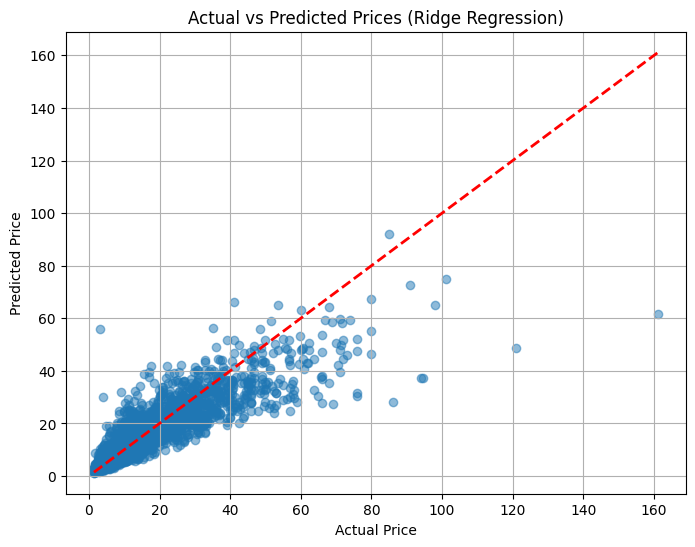

In [ ]:


# Crear gráfico de dispersión para el modelo log-transformado
plt.figure(figsize=(8, 6))

# Graficar precios reales vs predichos
plt.scatter(y_log_real, y_pred_log_real, alpha=0.5)

# Agregar línea de referencia (perfect prediction)
plt.plot([y_log_real.min(), y_log_real.max()],
         [y_log_real.min(), y_log_real.max()],
         color='red', linestyle='--', linewidth=2)

# Añadir títulos y etiquetas
plt.title('Actual vs Predicted Prices (Ridge Regression)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

# Guardar gráfico como imagen PNG en alta calidad (300 dpi)
plt.savefig("ridge_predictions_vs_actual.png", dpi=300, bbox_inches='tight')

# Mostrar gráfico en notebook
plt.show()


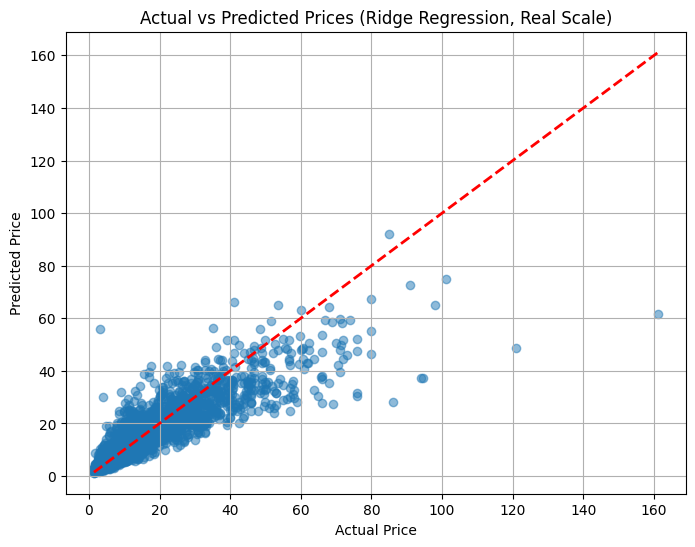

In [ ]:
# Crear gráfico de dispersión para el modelo log-transformado (el elegido final)
plt.figure(figsize=(8, 6))

# Graficar precios reales vs predichos
plt.scatter(y_log_real, y_pred_log_real, alpha=0.5)

# Agregar línea de referencia (perfect prediction)
plt.plot([y_log_real.min(), y_log_real.max()],
         [y_log_real.min(), y_log_real.max()],
         color='red', linestyle='--', linewidth=2)

# Añadir títulos y etiquetas
plt.title('Actual vs Predicted Prices (Ridge Regression, Real Scale)')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)

# Mostrar gráfico
plt.show()


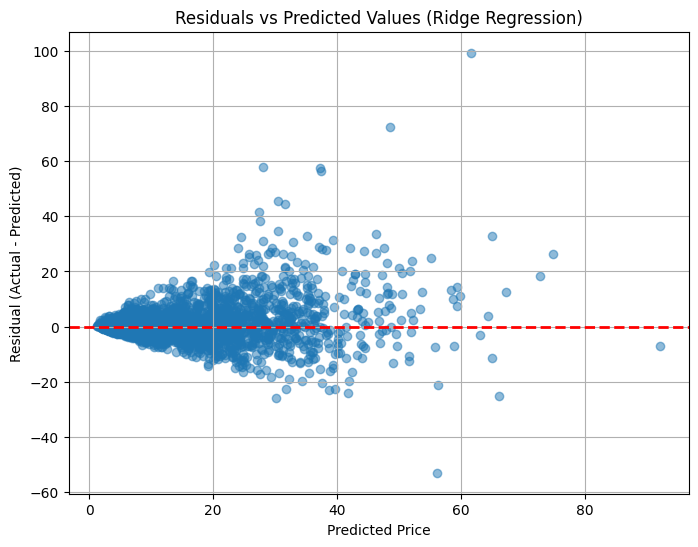

In [ ]:
# Calcular residuos (error)
residuals = y_log_real - y_pred_log_real

# Crear gráfico
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_log_real, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--', linewidth=2)

plt.title('Residuals vs Predicted Values (Ridge Regression)')
plt.xlabel('Predicted Price')
plt.ylabel('Residual (Actual - Predicted)')
plt.grid(True)
plt.savefig("ridge_residuals_plot.png", dpi=300, bbox_inches='tight')
plt.show()


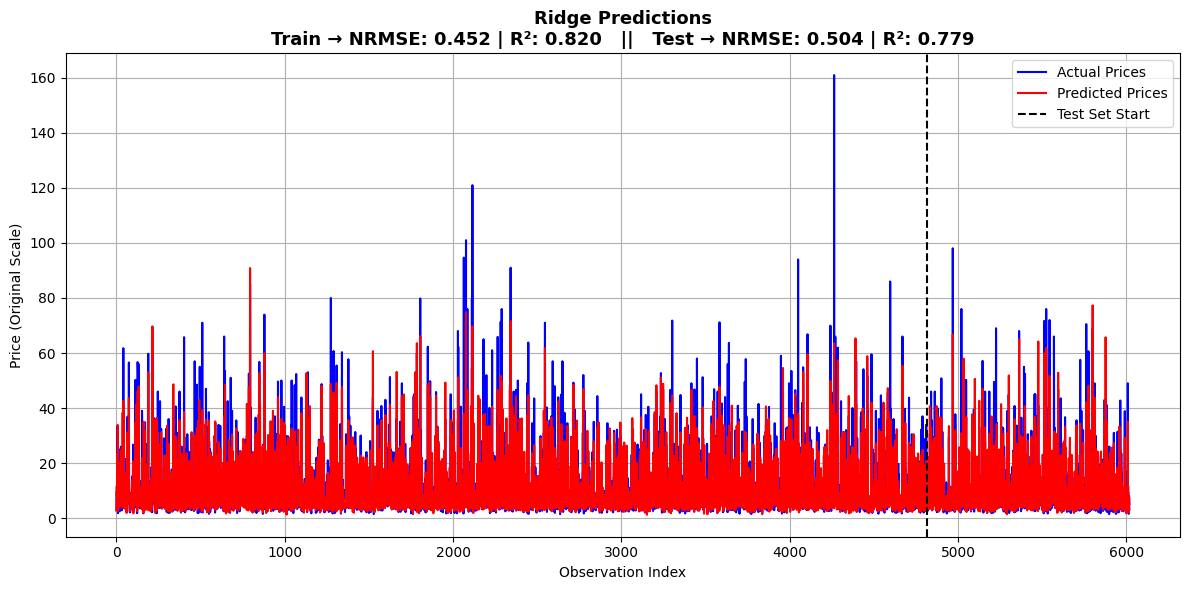

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Concatenar los reales y predichos del train y test (todos en escala real)
# Asegúrate de que estas variables existan:
# y_train_log, y_pred_train_log, y_test_log, y_pred_log

y_train_real = np.exp(y_train_log)
y_pred_train_real = np.exp(lr_log.predict(X_train_log_reduced))

y_test_real = np.exp(y_test_log)
y_pred_test_real = np.exp(y_pred_log)

# Juntar valores para graficar todo en una misma serie
y_real_all = np.concatenate([y_train_real, y_test_real])
y_pred_all = np.concatenate([y_pred_train_real, y_pred_test_real])

# Calcular métricas por separado
rmse_train = np.sqrt(mean_squared_error(y_train_real, y_pred_train_real))
nrmse_train = rmse_train / np.mean(y_train_real)
r2_train = r2_score(y_train_real, y_pred_train_real)

rmse_test = np.sqrt(mean_squared_error(y_test_real, y_pred_test_real))
nrmse_test = rmse_test / np.mean(y_test_real)
r2_test = r2_score(y_test_real, y_pred_test_real)

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(y_real_all, label="Actual Prices", color="blue")
plt.plot(y_pred_all, label="Predicted Prices", color="red")

# Marcar separación entre train y test
split_index = len(y_train_real)
plt.axvline(x=split_index, color='black', linestyle='--', label='Test Set Start')

# Título con métricas
plt.title(
    f'Ridge Predictions\n'
    f'Train → NRMSE: {nrmse_train:.3f} | R²: {r2_train:.3f}   ||   '
    f'Test → NRMSE: {nrmse_test:.3f} | R²: {r2_test:.3f}',
    fontsize=13, weight='bold'
)

plt.xlabel('Observation Index')
plt.ylabel('Price (Original Scale)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("ridge_train_test_comparison.png", dpi=300, bbox_inches='tight')
plt.show()


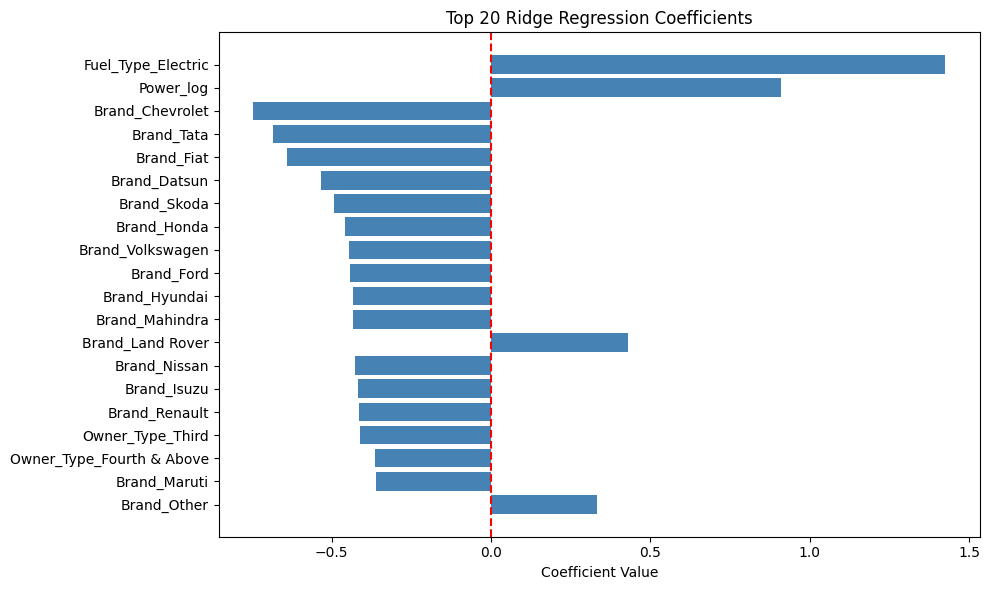

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Obtener coeficientes y nombres de features del modelo ya entrenado (lr_log)
coefficients = lr_log.coef_
feature_names = X_log_reduced.columns

# Crear DataFrame con coeficientes
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Ordenar por magnitud de los coeficientes
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# Filtrar las 10 variables más importantes
top_10 = coef_df.head(20)

# Graficar
plt.figure(figsize=(10, 6))
plt.barh(top_10['Feature'], top_10['Coefficient'], color='steelblue')
plt.axvline(0, color='red', linestyle='--')
plt.gca().invert_yaxis()
plt.title('Top 20 Ridge Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.savefig("ridge_top10_coefficients.png", dpi=300, bbox_inches='tight')
plt.show()
